In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
import multiprocessing as mp
import gc
import matplotlib.colors as colors
from matplotlib import rcParams 
from scipy.stats import gaussian_kde
from scipy.stats import binned_statistic_2d
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
plt.rc('font',size=25)
pd.set_option('max_column',200)
plt.rcParams.update({'figure.figsize': (6, 6),
                   'font.size':25,
                   'text.usetex':True,
                   'mathtext.default' : 'it',
                   'axes.labelsize': 32,
                   'legend.fontsize': 25,
                   'legend.fancybox': False,
                   'legend.numpoints': 1,
                   'xtick.labelsize': 32,
                   'ytick.labelsize': 32,
                   'ytick.major.width':0.8,
                   'ytick.major.size':8,
                   'ytick.minor.size':4,
                   'xtick.major.width': 0.8,
                   'xtick.major.size':8,
                   'xtick.minor.size':4,
                   'axes.linewidth':2,
                   'lines.linewidth':2,
                   'xtick.direction':'in',
                   'ytick.direction':'in',
                   'savefig.bbox': 'tight', # 'tight' or 'standard'.
                   'savefig.pad_inches' : 0.1})
plt.rc('font',**{'family':'serif','serif':['Computer Modern'],'sans-serif':['Computer Modern']})

from matplotlib.ticker import FuncFormatter
#%matplotlib inline

import glob

In [3]:
mg=pd.read_csv('../Downloads/catalog/final/totalgalaxy.csv')

In [22]:
m=pd.read_csv('../Downloads/catalog/diffraction/matchedall.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,9,10,12,14,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
m.iloc[:,[7,8,9,10,12,14,17,18,20]]=m.iloc[:,[7,8,9,10,12,14,17,18,20]].astype('float64',copy=False)

In [24]:
m.to_csv('../Downloads/catalog/diffraction/matchedall.csv',index=False)

# S82

In [4]:
s1=pd.read_csv('../Downloads/catalog/final/S82all.csv')

In [29]:
s2=pd.read_csv('../Downloads/catalog/diffraction/allra_Tian_Qiu.csv')

In [30]:
s3=pd.read_csv('../Downloads/catalog/diffraction/allra_Tian_Qiu_0.csv')

In [29]:
np.median(s3.colcErr),np.median(s3.colcErr_i),np.median(s3.colcErr_g)

(0.1769385, 0.16669915000000002, 0.22169425)

In [30]:
np.median(s3.rowcErr),np.median(s3.rowcErr_i),np.median(s3.rowcErr_g)

(0.1805056, 0.1745972, 0.2303794)

In [38]:
s=s1.merge(s2,on='objID')

In [39]:
s['ra_g']=s.ra+s.offsetRa_g/3600
s['dec_g']=s.dec+s.offsetDec_g/3600

In [40]:
s['ra_r']=s.ra
s['dec_r']=s.dec

In [41]:
s['ra_i']=s.ra+s.offsetRa_i/3600
s['dec_i']=s.dec+s.offsetDec_i/3600

In [42]:
s=s.drop(s.iloc[:,range(-16,-6)],axis=1)

In [44]:
s.to_csv('../Downloads/catalog/diffraction/S82all.csv',index=False)

In [9]:
s=pd.read_csv('../Downloads/catalog/diffraction/S82all.csv')

In [12]:
mg=mg.merge(s2,how='left')

In [7]:
mg['ra_r']=mg.ra_2
mg['dec_r']=mg.dec_2

In [15]:
mg['ra_g']=mg.ra_r+mg.offsetRa_g/3600
mg['dec_g']=mg.dec_r+mg.offsetDec_g/3600

In [14]:
mg['ra_i']=mg.ra_r+mg.offsetRa_i/3600
mg['dec_i']=mg.dec_r+mg.offsetDec_i/3600

In [24]:
mg=mg.drop(mg.iloc[:,range(-12,-2)],axis=1)

# HSC

In [45]:
h1=pd.read_csv('../Downloads/catalog/final/hscallprimary.csv')

In [46]:
h2=pd.read_csv('../Downloads/catalog/diffraction/335124.csv')

In [47]:
h3=pd.read_csv('../Downloads/catalog/final/hscallprimary_mjd.csv')

In [52]:
h1=h1.drop(h1.iloc[:,[1,2,3]],axis=1)

In [60]:
h=h1.merge(h2.iloc[:,[0,1,2,5,6]])

In [64]:
h=h.merge(h3.iloc[:,[1,-1]])

In [16]:
h.to_csv('../Downloads/catalog/diffraction/HSCall.csv',index=False)

In [5]:
h=pd.read_csv('../Downloads/catalog/diffraction/HSCall.csv')

In [14]:
h['g_sdsscentroid_ra'][h.g_sdsscentroid_ra>180]=h[h.g_sdsscentroid_ra>180].g_sdsscentroid_ra-360
h['r_sdsscentroid_ra'][h.r_sdsscentroid_ra>180]=h[h.r_sdsscentroid_ra>180].r_sdsscentroid_ra-360

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [228]:
h['r_sdsscentroid_ra']=h2.r_sdsscentroid_ra
h['r_sdsscentroid_dec']=h2.r_sdsscentroid_dec

In [ ]:
h['r_sdsscentroid_ra'][h.r_sdsscentroid_ra>180]=h[h.r_sdsscentroid_ra>180].r_sdsscentroid_ra-360

# Galaxy

In [18]:
mg=pd.read_csv('../Downloads/catalog/final/totalgalaxy.csv')

In [21]:
mg=mg.merge(h,how='left')

KeyboardInterrupt: 

In [ ]:
mg=mg.merge(s,how='left')

In [55]:
mg=mg.drop(mg.iloc[:,[-5,-1]],axis=1)

In [25]:
mg=m[(m.i_cmodel_mag-m.i_psfflux_mag<-0.08)&(m.type==3)]

In [50]:
len(mg)

3153981

In [27]:
mg=mg[pd.notna(mg.g_sdsscentroid_ra)]

In [28]:
len(mg)

3280533

In [59]:
mg['g_sdsscentroid_ra'][mg.g_sdsscentroid_ra>180]=mg[mg.g_sdsscentroid_ra>180].g_sdsscentroid_ra-360
mg['r_sdsscentroid_ra'][mg.r_sdsscentroid_ra>180]=mg[mg.r_sdsscentroid_ra>180].r_sdsscentroid_ra-360
mg['i_sdsscentroid_ra'][mg.i_sdsscentroid_ra>180]=mg[mg.i_sdsscentroid_ra>180].i_sdsscentroid_ra-360

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [60]:
mg['pmra_g']=(mg.g_sdsscentroid_ra-mg.ra_g)*3600*1000/mg.delta_yr
mg['pmdec_g']=(mg.g_sdsscentroid_dec-mg.dec_g)*3600*1000/mg.delta_yr
mg['pmra_r']=(mg.r_sdsscentroid_ra-mg.ra_r)*3600*1000/mg.delta_yr
mg['pmdec_r']=(mg.r_sdsscentroid_dec-mg.dec_r)*3600*1000/mg.delta_yr
mg['pmra_i']=(mg.i_sdsscentroid_ra-mg.ra_i)*3600*1000/mg.delta_yr
mg['pmdec_i']=(mg.i_sdsscentroid_dec-mg.dec_i)*3600*1000/mg.delta_yr

(array([3.400000e+01, 2.600000e+01, 6.300000e+01, 6.900000e+01,
        7.500000e+01, 9.000000e+01, 1.130000e+02, 1.500000e+02,
        1.750000e+02, 2.780000e+02, 3.620000e+02, 4.520000e+02,
        6.220000e+02, 8.730000e+02, 1.303000e+03, 2.128000e+03,
        3.067000e+03, 4.999000e+03, 8.578000e+03, 1.522800e+04,
        2.885900e+04, 5.901700e+04, 1.314920e+05, 3.240750e+05,
        8.252250e+05, 1.038356e+06, 4.157880e+05, 1.558760e+05,
        6.619700e+04, 3.069000e+04, 1.581800e+04, 8.502000e+03,
        4.869000e+03, 2.926000e+03, 1.808000e+03, 1.133000e+03,
        7.880000e+02, 5.350000e+02, 3.670000e+02, 2.750000e+02,
        1.880000e+02, 1.420000e+02, 1.340000e+02, 8.700000e+01,
        7.600000e+01, 5.800000e+01, 4.800000e+01, 4.000000e+01,
        4.300000e+01]),
 array([-500, -480, -460, -440, -420, -400, -380, -360, -340, -320, -300,
        -280, -260, -240, -220, -200, -180, -160, -140, -120, -100,  -80,
         -60,  -40,  -20,    0,   20,   40,   60,   80,  100

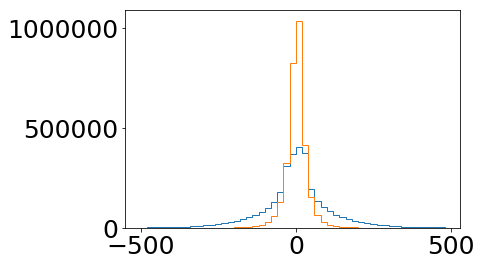

In [77]:
plt.hist((mg.ra_r-mg.ra_i)*3600*1000,bins=np.arange(-500,500,20),histtype='step')
plt.hist((mg.r_sdsscentroid_ra-mg.i_sdsscentroid_ra)*3600*1000,bins=np.arange(-500,500,20),histtype='step')

# quasar

In [ ]:
q=pd.read_csv('../Downloads/catalog/final/matchedquasar.csv')

In [91]:
q=q.merge(s2,how='left')

In [94]:
q['ra_r']=q.ra_2
q['dec_r']=q.dec_2
q['ra_g']=q.ra_r+q.offsetRa_g/3600
q['dec_g']=q.dec_r+q.offsetDec_g/3600
q['ra_i']=q.ra_r+q.offsetRa_i/3600
q['dec_i']=q.dec_r+q.offsetDec_i/3600

In [97]:
q=q.drop(q.iloc[:,range(-16,-6)],axis=1)

In [103]:
q=q.merge(h2,how='left')

In [105]:
q=q.drop(q.iloc[:,range(-8,-0)],axis=1)

In [107]:
q=q.drop(q.iloc[:,[-5,-1]],axis=1)

In [110]:
q['g_sdsscentroid_ra'][q.g_sdsscentroid_ra>180]=q[q.g_sdsscentroid_ra>180].g_sdsscentroid_ra-360
q['r_sdsscentroid_ra'][q.r_sdsscentroid_ra>180]=q[q.r_sdsscentroid_ra>180].r_sdsscentroid_ra-360
q['i_sdsscentroid_ra'][q.i_sdsscentroid_ra>180]=q[q.i_sdsscentroid_ra>180].i_sdsscentroid_ra-360

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [111]:
q['pmra_g']=(q.g_sdsscentroid_ra-q.ra_g)*3600*1000/q.delta_yr
q['pmdec_g']=(q.g_sdsscentroid_dec-q.dec_g)*3600*1000/q.delta_yr
q['pmra_r']=(q.r_sdsscentroid_ra-q.ra_r)*3600*1000/q.delta_yr
q['pmdec_r']=(q.r_sdsscentroid_dec-q.dec_r)*3600*1000/q.delta_yr
q['pmra_i']=(q.i_sdsscentroid_ra-q.ra_i)*3600*1000/q.delta_yr
q['pmdec_i']=(q.i_sdsscentroid_dec-q.dec_i)*3600*1000/q.delta_yr

# Matched_g

In [7]:
m=pd.read_csv('../Downloads/catalog/diffraction/matchedall.csv')

In [86]:
len(m)

4343546

In [81]:
m.iloc[:,[4,5,6,7,9,11,14,15,17]]=m.iloc[:,[4,5,6,7,9,11,14,15,17]].astype('float64',copy=False)

In [82]:
m['delta_mjd']=m.mean_mjd-m.S82_mean_mjd

In [83]:
m['delta_yr']=m.delta_mjd/365.24

In [84]:
m['dra']=(m.g_sdsscentroid_ra-m.ra_g)*3600*1000#mas
m['ddec']=(m.g_sdsscentroid_dec-m.dec_g)*3600*1000#mas

In [85]:
m['pmra']=m.dra/m.delta_yr
m['pmdec']=m.ddec/m.delta_yr

In [89]:
mg=m[(m.i_cmodel_mag-m.i_psfflux_mag<-0.08)&(m.type==3)]

In [78]:
#clip
def calc_cov(mc):
    if mc.shape[0]==2 and mc.shape[1]!=2:
        mc=mc.T
    cov=np.cov(mc.T)
    return cov
def clip(t):
    l=[]
    mx2=np.array([t.pmra_g,t.pmdec_g])
    mx2=mx2.T
    for k,y in enumerate(mx2):
        cov=calc_cov(mx2)
        if (y-mx2.mean(0)).dot(np.linalg.inv(cov)).dot(y-mx2.mean(0))<11.8:
            l.append(k)
    return t.iloc[l]

In [79]:
x=np.arange(-30,36.05,0.05)#1320
y=np.arange(-1.25,1.3,0.05)#50
def grid(j):#for i in range(len(x)-1): #rows, dec
    Z3=[]
    print(j)
    for i in range(len(x)-1): #columns, ra
        #print(j,i)
        t=mg[(mg.i_sdsscentroid_ra<x[i+1])&(mg.i_sdsscentroid_ra>x[i])&(mg.i_sdsscentroid_dec>y[j])&(mg.i_sdsscentroid_dec<y[j+1])]
        if (len(t)==0)|(len(t)==1):
            tem=t
        else:
            tem=clip(t)#clip 3 sigma for each grid
        Z3.append(tem)
    print(j,'-')
    return Z3

In [80]:
pool1=mp.Pool(12)
data1=pool1.map(grid,range(len(y)-1))
pool1.close()

4
14
16
20
18
22
0
2
6
8
12
10
22 -
23
20 -
21
18 -
19
14 -
15
0 -
1
10 -
11
16 -
17
12 -
13
4 -
5
2 -
3
6 -
7
8 -
9
1 -
23 -
15 -
19 -
3 -
11 -
21 -
24
13 -
5 -
9 -
17 -
7 -
26
28
30
32
34
36
38
40
42
44
46
24 -
25
26 -
27
28 -
29
30 -
31
32 -
33
34 -
35
36 -
37
38 -
39
40 -
41
42 -
43
44 -
45
46 -
47
25 -
48
27 -
29 -
31 -
33 -
35 -
37 -
39 -
41 -
43 -
45 -
47 -
48 -
49
49 -


In [145]:
Zra=[[] for i in range(len(data1))]
Zdec=[[] for i in range(len(data1))]
Zrasem=[[] for i in range(len(data1))]
Zdecsem=[[] for i in range(len(data1))]
Znum=[[] for i in range(len(data1))]
for i in range(len(data1)):
    print(i)
    for j in range(len(data1[i])):
        Znum[i].append(len(data1[i][j]))
        Zra[i].append(np.mean(data1[i][j].pmra_g))
        Zdec[i].append(np.mean(data1[i][j].pmdec_g))
        Zrasem[i].append(stats.sem(data1[i][j].pmra_g))
        Zdecsem[i].append(stats.sem(data1[i][j].pmdec_g))

0


/Users/tianqiu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [146]:
Znum1=pd.DataFrame(Znum)
Zra1=pd.DataFrame(Zra)
Zdec1=pd.DataFrame(Zdec)
Zrasem1=pd.DataFrame(Zrasem)
Zdecsem1=pd.DataFrame(Zdecsem)

In [ ]:
Znum1.to_csv('../Downloads/catalog/diffraction/Znum.csv',index=False)
Zra1.to_csv('../Downloads/catalog/diffraction/Zra.csv',index=False)
Zdec1.to_csv('../Downloads/catalog/diffraction/Zdec.csv',index=False)
Zrasem1.to_csv('../Downloads/catalog/diffraction/Zrasem.csv',index=False)
Zdecsem1.to_csv('../Downloads/catalog/diffraction/Zdecsem.csv',index=False)

In [105]:
q=pd.read_csv('../Downloads/catalog/diffraction/matched_qso.csv')

In [113]:
q=q[q.Separation<0.2]

In [140]:
len(q)

8863

In [110]:
q['delta_mjd']=q.mean_mjd-q.S82_mean_mjd
q['delta_yr']=q.delta_mjd/365.24
q['dra']=(q.g_sdsscentroid_ra-q.ra_g)*3600*1000#mas
q['ddec']=(q.g_sdsscentroid_dec-q.dec_g)*3600*1000#mas
q['pmra']=q.dra/q.delta_yr
q['pmdec']=q.ddec/q.delta_yr

In [198]:
xm1=[]
ram1=[]
decm1=[]
ram21=[]
decm21=[]
rae1=[]
dece1=[]
rae21=[]
dece21=[]
        
for j in range(-30,37):
    t1=mg[(mg.i_sdsscentroid_ra>j)&(mg.i_sdsscentroid_ra<=(1+j))]
    t2=q[(q.i_sdsscentroid_ra>j)&(q.i_sdsscentroid_ra<=(j+1))]
    if t2.empty:
        continue
    xm1.append(j)
    
    ram1.append(np.mean(t1.pmra_g))
    decm1.append(np.mean(t1.pmdec_g))
    ram21.append(np.mean(t2.pmra_g))
    decm21.append(np.mean(t2.pmdec_g))
    rae1.append(stats.sem(t1.pmra_g))
    dece1.append(stats.sem(t1.pmdec_g))
    rae21.append(stats.sem(t2.pmra_g))
    dece21.append(stats.sem(t2.pmdec_g))

In [148]:
x=np.arange(-30,36.05,0.05)#1320
y=np.arange(-1.25,1.3,0.05)#50
def cali_qso(i):#for i in range(len(x)-1): #columns, ra
    print(i)
    t=[]
    for j in range(len(y)-1): #rows, dec
        tt=q[(q.i_sdsscentroid_ra<x[i+1])&(q.i_sdsscentroid_ra>x[i])&(q.i_sdsscentroid_dec>y[j])&(q.i_sdsscentroid_dec<y[j+1])].copy()
        if len(tt)==0:
            continue
        tt['pmra_cl_g']=tt.pmra_g-Zra1.iloc[j,i]
        tt['pmdec_cl_g']=tt.pmdec_g-Zdec1.iloc[j,i]
        t.append(tt)
    if len(t)!=0:
        ttt=pd.concat(t)
        print(i,'-')
        return ttt
    else:
        print(i,'-0')
        return tt
            

In [149]:
pool1=mp.Pool(12)
data=pool1.map(cali_qso,range(len(x)-1))
pool1.close()

0
56
112
140
28
84
252
280
196
168
308
224
28 -
196 -
84 -
140 -
85
197
29
252 -
56 -
141
253
280 -
281
224 -
0 -
57
308 -
225
1
112 -
309
113
168 -
169
29 -
30
141 -
142
85 -
1 -
86
2
197 -
57 -
198
253 -
58
225 -
309 -
254
310
226
113 -
114
169 -
170
281 -
282
142 -
30 -
86 -
143
31
87
2 -
198 -
226 -
3
199
227
58 -
59
114 -
115
310 -
311
254 -
255
170 -
171
282 -
283
143 -
3 -
144
31 -
4
32
59 -
60
199 -
227 -
200
228
87 -
88
311 -
312
255 -
256
115 -
116
171 -
283 -
284
172
144 -
200 -
145
201
4 -
5
88 -
89
228 -
229
32 -
33
312 -
313
256 -
257
284 -
285
172 -
173
60 -
61
116 -
117
201 -
145 -
202
146
5 -
6
313 -
314
33 -
34
229 -
230
89 -
90
285 -
61 -
286
62
173 -
174
257 -
258
117 -
118
6 -
7
146 -
147
34 -
35
90 -
91
202 -
258 -
230 -
314 -
203
259
231
315
286 -
287
174 -
175
62 -
63
118 -
119
147 -
148
7 -
8
315 -
316
259 -
260
287 -
288
203 -
204
35 -
36
231 -
232
175 -
176
91 -
92
63 -
64
119 -
120
148 -
149
232 -
233
260 -
261
204 -
205
316 -
317
64 -
65
92 -
93
8 -
36 -
28

908
716 -0
717
827 -0
687 -0
828
688
771 -0
772
799 -0
881 -0
882
800
855 -0
959 -
856
960
987 -
988
931 -
932
744 -0
745
908 -0
909
828 -0
829
717 -0
718
688 -0
689
772 -0
773
800 -0
801
882 -0
883
856 -0
857
960 -
961
745 -0
746
909 -0
910
829 -0
830
932 -
718 -0
719
933
689 -0
690
988 -
989
773 -0
774
801 -0
802
883 -0
884
857 -0
858
961 -
962
746 -0
747
910 -0
911
719 -0
830 -0
831
720
690 -0
774 -0
691
775
802 -0
884 -0
803
885
858 -0
859
933 -
989 -
934
990
747 -0
748
831 -0
832
720 -0
721
911 -
912
962 -
963
691 -0
692
775 -0
776
803 -0
804
885 -0
886
859 -0
860
990 -
991
934 -
935
748 -0
749
832 -0
833
721 -0
722
692 -0
912 -
693
913
776 -0
777
804 -0
963 -
964
805
886 -0
860 -0
887
861
749 -0
750
991 -
992
935 -
936
833 -0
722 -0
723
834
693 -0
694
777 -0
778
913 -
914
805 -0
806
861 -0
862
887 -0
888
964 -
965
750 -0
751
834 -0
835
723 -0
778 -0
694 -0
992 -
724
779
993
695
936 -
937
914 -
915
806 -0
807
862 -0
863
888 -0
889
751 -0
752
835 -0
836
724 -0
725
965 -
966
695 -0


In [150]:
qc=pd.concat(data)

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [151]:
len(qc)

8863

In [152]:
qc=qc[pd.notna(qc.pmdec_cl_g)]

In [153]:
len(qc)

8861

In [154]:
def clip_q(t):
    l=[]
    mx2=np.array([t.pmra_cl_g,t.pmdec_cl_g])
    mx2=mx2.T
    for k,y in enumerate(mx2):
        cov=calc_cov(mx2)
        if (y-mx2.mean(0)).dot(np.linalg.inv(cov)).dot(y-mx2.mean(0))<11.8:
            l.append(k)
    return t.iloc[l]

In [155]:
qcg=clip_q(qc)

In [156]:
len(qcg)

8742

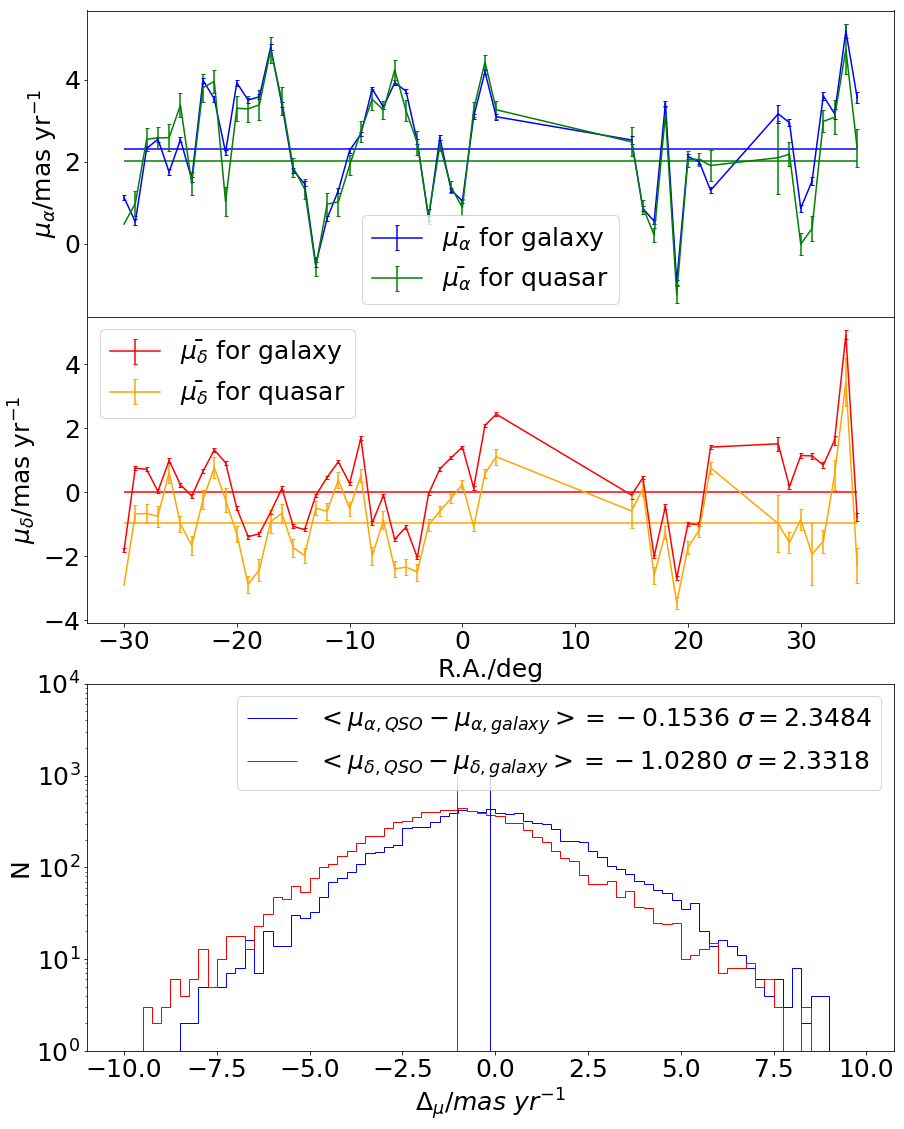

In [199]:
ax=plt.figure(figsize=(14,17))
ax.add_axes([0.1,0.7,0.8,0.25])
#plt.title(r'$Angular offset per year versus R.A. by quasars and galaxies',fontsize=25)
plt.hlines(np.mean(mg.pmra_g),np.min(xm),np.max(xm),color='blue')
plt.hlines(np.mean(qcg.pmra_g),np.min(xm),np.max(xm),color='green')
plt.errorbar(xm1,ram1,yerr=rae1,fmt='-',capsize=2,color='blue',label=r'$\bar{\mu_{\alpha}}$ for galaxy')
plt.errorbar(xm1,ram21,yerr=rae21,fmt='-',capsize=2,color='green',label=r'$\bar{\mu_{\alpha}}$ for quasar')
plt.legend()
plt.xlim()
plt.ylabel(r'$\mu_{\alpha}/\mathrm{mas\ yr^{-1}}$')
ax.add_axes([0.1,0.45,0.8,0.25])
plt.hlines(np.mean(mg.pmdec_g),np.min(xm),np.max(xm),color='red')
plt.hlines(np.mean(qcg.pmdec_g),np.min(xm),np.max(xm),color='orange')
plt.errorbar(xm1,decm1,yerr=dece1,fmt='-',capsize=2,color='red',label=r'$\bar{\mu_{\delta}}$ for galaxy')
plt.errorbar(xm1,decm21,yerr=dece21,fmt='-',capsize=2,color='orange',label=r'$\bar{\mu_{\delta}}$ for quasar')
plt.legend()
plt.xlabel('R.A./deg')
plt.ylabel(r'$\mu_{\delta}/\mathrm{mas\ yr^{-1}}$')

ax.add_axes([0.1,0.1,0.8,0.3])
bins=np.arange(-10,10,0.25)
plt.hist(qcg.pmra_cl_g,bins=bins,histtype='step',color='blue')
plt.hist(qcg.pmdec_cl_g,bins=bins,histtype='step',color='red')
plt.yscale('log')
plt.vlines(np.mean(qcg.pmra_cl_g),0,1e3,linewidth=1,color='blue',label=r'$<\mu_{\alpha,QSO}-\mu_{\alpha,galaxy}>=%0.4f\ \sigma=%0.4f$'%(np.mean(qcg.pmra_cl_g),np.std(qcg.pmra_cl_g)))
plt.vlines(np.mean(qcg.pmdec_cl_g),0,1e3,linewidth=1,color='red',label=r'$<\mu_{\delta,QSO}-\mu_{\delta,galaxy}>=%0.4f\ \sigma=%0.4f$'%(np.mean(qcg.pmdec_cl_g),np.std(qcg.pmdec_cl_g)))
plt.ylim([1,1e4])
plt.legend()
plt.title('')
plt.ylabel('N')
plt.xlabel(r'$\Delta_\mu/mas\ yr^{-1}$')
plt.savefig('/Users/tianqiu/Downloads/QSO_G/g.png')

# Matched_i

In [159]:
mi=pd.read_csv('../Downloads/catalog/diffraction/Matchall_i.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,6,7,8,10,12,15,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [160]:
mi.iloc[:,[5,6,7,8,10,12,15,16,18]]=mi.iloc[:,[5,6,7,8,10,12,15,16,18]].astype('float64',copy=False)

In [206]:
mi['delta_mjd']=mi.mean_mjd-mi.S82_mean_mjd
mi['delta_yr']=mi.delta_mjd/365.24
mi['dra']=(mi.i_sdsscentroid_ra-mi.ra_i)*3600*1000#mas
mi['ddec']=(mi.i_sdsscentroid_dec-mi.dec_i)*3600*1000#mas
mi['pmra']=mi.dra/mi.delta_yr
mi['pmdec']=mi.ddec/mi.delta_yr

In [207]:
mgi=mi[(mi.i_cmodel_mag-mi.i_psfflux_mag<-0.08)&(mi.type==3)]

In [142]:
#clip
def calc_cov(mc):
    if mc.shape[0]==2 and mc.shape[1]!=2:
        mc=mc.T
    cov=np.cov(mc.T)
    return cov
def clip(t):
    l=[]
    mx2=np.array([t.pmra_i,t.pmdec_i])
    mx2=mx2.T
    for k,y in enumerate(mx2):
        cov=calc_cov(mx2)
        if (y-mx2.mean(0)).dot(np.linalg.inv(cov)).dot(y-mx2.mean(0))<11.8:
            l.append(k)
    return t.iloc[l]

In [143]:
x=np.arange(-30,36.05,0.05)#1320
y=np.arange(-1.25,1.3,0.05)#50
def grid(j):#for i in range(len(x)-1): #rows, dec
    Z3=[]
    print(j)
    for i in range(len(x)-1): #columns, ra
        #print(j,i)
        t=mg[(mg.i_sdsscentroid_ra<x[i+1])&(mg.i_sdsscentroid_ra>x[i])&(mg.i_sdsscentroid_dec>y[j])&(mg.i_sdsscentroid_dec<y[j+1])]
        if (len(t)==0)|(len(t)==1):
            tem=t
        else:
            tem=clip(t)#clip 3 sigma for each grid
        Z3.append(tem)
    print(j,'-')
    return Z3

In [144]:
pool1=mp.Pool(12)
data2=pool1.map(grid,range(len(y)-1))
pool1.close()

2
4
0
6
16
18
10
8
20
12
14
22
0 -
1
18 -
19
10 -
4 -
11
5
20 -
21
16 -
17
8 -
9
14 -
15
2 -
3
12 -
13
22 -
23
6 -
7
1 -
24
19 -
17 -
21 -
15 -
11 -
5 -
9 -
3 -
13 -
26
7 -
23 -
28
30
32
34
36
38
40
42
44
46
24 -
25
26 -
27
28 -
29
30 -
31
32 -
33
34 -
35
36 -
37
38 -
39
40 -
41
42 -
43
44 -
45
46 -
47
25 -
48
27 -
29 -
31 -
33 -
35 -
37 -
39 -
41 -
43 -
45 -
47 -
48 -
49
49 -


In [158]:
Zra2=[[] for i in range(len(data2))]
Zdec2=[[] for i in range(len(data2))]
Zrasem2=[[] for i in range(len(data2))]
Zdecsem2=[[] for i in range(len(data2))]
Znum2=[[] for i in range(len(data2))]
for i in range(len(data2)):
    print(i)
    for j in range(len(data2[i])):
        Znum2[i].append(len(data2[i][j]))
        Zra2[i].append(np.mean(data2[i][j].pmra_i))
        Zdec2[i].append(np.mean(data2[i][j].pmdec_i))
        Zrasem2[i].append(stats.sem(data2[i][j].pmra_i))
        Zdecsem2[i].append(stats.sem(data2[i][j].pmdec_i))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [159]:
Znum2=pd.DataFrame(Znum2)
Zra2=pd.DataFrame(Zra2)
Zdec2=pd.DataFrame(Zdec2)
Zrasem2=pd.DataFrame(Zrasem2)
Zdecsem2=pd.DataFrame(Zdecsem2)

In [170]:
qi=pd.read_csv('../Downloads/catalog/diffraction/matched_qso_i.csv')

In [173]:
qi=qi[qi.Separation<0.2]

In [174]:
len(qi)

8903

In [213]:
qi['delta_mjd']=qi.mean_mjd-qi.S82_mean_mjd
qi['delta_yr']=qi.delta_mjd/365.24
qi['dra']=(qi.i_sdsscentroid_ra-qi.ra_i)*3600*1000#mas
qi['ddec']=(qi.i_sdsscentroid_dec-qi.dec_i)*3600*1000#mas
qi['pmra']=qi.dra/qi.delta_yr
qi['pmdec']=qi.ddec/qi.delta_yr

In [201]:
xm2=[]
ram2=[]
decm2=[]
ram22=[]
decm22=[]
rae2=[]
dece2=[]
rae22=[]
dece22=[]
        
for j in range(-30,37):
    t1=mg[(mg.i_sdsscentroid_ra>j)&(mg.i_sdsscentroid_ra<=(1+j))]
    t2=q[(q.i_sdsscentroid_ra>j)&(q.i_sdsscentroid_ra<=(j+1))]
    if t2.empty:
        continue
    xm2.append(j)
    
    ram2.append(np.mean(t1.pmra_i))
    decm2.append(np.mean(t1.pmdec_i))
    ram22.append(np.mean(t2.pmra_i))
    decm22.append(np.mean(t2.pmdec_i))
    rae2.append(stats.sem(t1.pmra_i))
    dece2.append(stats.sem(t1.pmdec_i))
    rae22.append(stats.sem(t2.pmra_i))
    dece22.append(stats.sem(t2.pmdec_i))

In [164]:
x=np.arange(-30,36.05,0.05)#1320
y=np.arange(-1.25,1.3,0.05)#50
def cali_qso(i):#for i in range(len(x)-1): #columns, ra
    print(i)
    t=[]
    for j in range(len(y)-1): #rows, dec
        tt=q[(q.i_sdsscentroid_ra<x[i+1])&(q.i_sdsscentroid_ra>x[i])&(q.i_sdsscentroid_dec>y[j])&(q.i_sdsscentroid_dec<y[j+1])].copy()
        if len(tt)==0:
            continue
        tt['pmra_cl_i']=tt.pmra_i-Zra2.iloc[j,i]
        tt['pmdec_cl_i']=tt.pmdec_i-Zdec2.iloc[j,i]
        t.append(tt)
    if len(t)!=0:
        ttt=pd.concat(t)
        print(i,'-')
        return ttt
    else:
        print(i,'-0')
        return tt
            

In [165]:
pool1=mp.Pool(12)
data2=pool1.map(cali_qso,range(len(x)-1))
pool1.close()

140
84
0
28
112
252
56
168
196
280
308
224
84 -
85
28 -
196 -
0 -
56 -
29
57
197
1
140 -
141
112 -
224 -
225
113
252 -
253
168 -
169
280 -
281
308 -
309
141 -
142
29 -
57 -
30
58
1 -
85 -
86
2
225 -
197 -
226
198
113 -
114
253 -
169 -
254
170
309 -
310
281 -
282
2 -
3
226 -
227
142 -
114 -
143
115
58 -
30 -
86 -
59
31
87
198 -
199
170 -
171
254 -
255
310 -
311
282 -
283
3 -
4
59 -
60
227 -
143 -
228
144
87 -
199 -
88
200
31 -
32
115 -
116
255 -
256
311 -
171 -
312
172
283 -
284
4 -
5
200 -
201
32 -
33
144 -
145
116 -
117
228 -
60 -
229
88 -
61
89
256 -
257
172 -
312 -
173
313
284 -
285
5 -
6
201 -
145 -
202
146
229 -
230
33 -
61 -
89 -
117 -
62
34
90
118
257 -
258
313 -
314
285 -
286
173 -
174
6 -
7
146 -
147
202 -
203
230 -
62 -
34 -
231
63
35
90 -
91
258 -
259
118 -
119
286 -
287
174 -
175
314 -
315
7 -
8
147 -
148
203 -
204
35 -
36
259 -
260
231 -
232
63 -
64
91 -
92
287 -
288
175 -
176
119 -
120
315 -
316
148 -
149
8 -
9
204 -
205
232 -
233
92 -
93
36 -
37
260 -
261
64 -
65
120 -
1

987
772
799 -0
800
907 -0
908
855 -0
856
827 -0
828
687 -0
688
881 -0
882
716 -0
717
959 -
744 -0
745
960
772 -0
773
856 -0
800 -0
987 -
988
857
801
931 -
932
908 -0
909
828 -0
829
688 -0
689
882 -0
883
745 -0
746
717 -0
718
960 -
961
773 -0
774
801 -0
802
909 -0
910
857 -0
858
829 -0
830
689 -0
690
883 -0
884
746 -0
747
932 -
933
718 -0
719
988 -
989
774 -0
775
961 -
962
802 -0
803
910 -0
911
858 -0
830 -0
831
859
690 -0
691
884 -0
719 -0
720
885
747 -0
748
775 -0
776
933 -
934
989 -
990
803 -0
831 -0
859 -0
804
832
860
911 -
962 -
912
963
691 -0
692
885 -0
886
720 -0
748 -0
721
749
776 -0
777
804 -0
832 -0
805
833
860 -0
990 -
861
991
934 -
935
692 -0
693
912 -
913
886 -0
887
721 -0
722
749 -0
963 -
750
964
777 -0
778
833 -0
805 -0
806
834
861 -0
862
693 -0
694
991 -
992
935 -
936
887 -0
888
913 -
914
722 -0
723
750 -0
751
778 -0
779
964 -
965
806 -0
807
834 -0
835
862 -0
863
694 -0
695
888 -0
889
914 -
915
751 -0
752
723 -0
724
992 -
993
779 -0
936 -
780
937
807 -0
808
835 -0
836
86

In [166]:
qc=pd.concat(data2)

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [167]:
len(qc)

8863

In [168]:
qc=qc[pd.notna(qc.pmra_cl_i)]

In [169]:
len(qc)

8862

In [170]:
def clip_q(t):
    l=[]
    mx2=np.array([t.pmra_cl_i,t.pmdec_cl_i])
    mx2=mx2.T
    for k,y in enumerate(mx2):
        cov=calc_cov(mx2)
        if (y-mx2.mean(0)).dot(np.linalg.inv(cov)).dot(y-mx2.mean(0))<11.8:
            l.append(k)
    return t.iloc[l]

In [171]:
qci=clip_q(qc)

In [172]:
len(qci)

8748

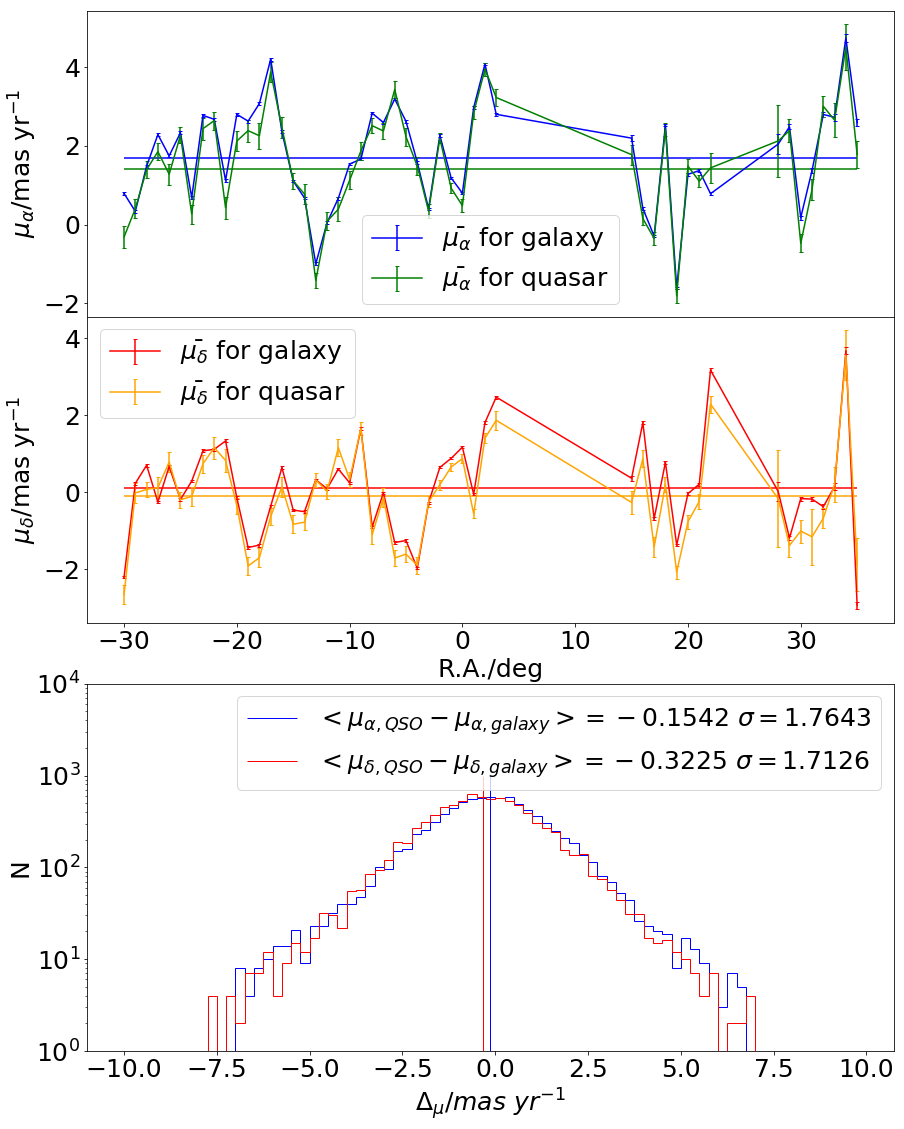

In [202]:
ax=plt.figure(figsize=(14,17))
ax.add_axes([0.1,0.7,0.8,0.25])
#plt.title(r'$Angular offset per year versus R.A. by quasars and galaxies',fontsize=25)
plt.hlines(np.mean(mg.pmra_i),np.min(xm),np.max(xm),color='blue')
plt.hlines(np.mean(qci.pmra_i),np.min(xm),np.max(xm),color='green')
plt.errorbar(xm2,ram2,yerr=rae2,fmt='-',capsize=2,color='blue',label=r'$\bar{\mu_{\alpha}}$ for galaxy')
plt.errorbar(xm2,ram22,yerr=rae22,fmt='-',capsize=2,color='green',label=r'$\bar{\mu_{\alpha}}$ for quasar')
plt.legend()
plt.xlim()
plt.ylabel(r'$\mu_{\alpha}/\mathrm{mas\ yr^{-1}}$')
ax.add_axes([0.1,0.45,0.8,0.25])
plt.hlines(np.mean(mg.pmdec_i),np.min(xm),np.max(xm),color='red')
plt.hlines(np.mean(qci.pmdec_i),np.min(xm),np.max(xm),color='orange')
plt.errorbar(xm2,decm2,yerr=dece2,fmt='-',capsize=2,color='red',label=r'$\bar{\mu_{\delta}}$ for galaxy')
plt.errorbar(xm2,decm22,yerr=dece22,fmt='-',capsize=2,color='orange',label=r'$\bar{\mu_{\delta}}$ for quasar')
plt.legend()
plt.xlabel('R.A./deg')
plt.ylabel(r'$\mu_{\delta}/\mathrm{mas\ yr^{-1}}$')

ax.add_axes([0.1,0.1,0.8,0.3])
bins=np.arange(-10,10,0.25)
plt.hist(qci.pmra_cl_i,bins=bins,histtype='step',color='blue')
plt.hist(qci.pmdec_cl_i,bins=bins,histtype='step',color='red')
plt.yscale('log')
plt.vlines(np.mean(qci.pmra_cl_i),0,1e3,linewidth=1,color='blue',label=r'$<\mu_{\alpha,QSO}-\mu_{\alpha,galaxy}>=%0.4f\ \sigma=%0.4f$'%(np.mean(qci.pmra_cl_i),np.std(qci.pmra_cl_i)))
plt.vlines(np.mean(qci.pmdec_cl_i),0,1e3,linewidth=1,color='red',label=r'$<\mu_{\delta,QSO}-\mu_{\delta,galaxy}>=%0.4f\ \sigma=%0.4f$'%(np.mean(qci.pmdec_cl_i),np.std(qci.pmdec_cl_i)))
plt.ylim([1,1e4])
plt.legend()
plt.title('')
plt.ylabel('N')
plt.xlabel(r'$\Delta_\mu/mas\ yr^{-1}$')
plt.savefig('/Users/tianqiu/Downloads/QSO_G/i.png')

# matched_r

In [175]:
#clip
def calc_cov(mc):
    if mc.shape[0]==2 and mc.shape[1]!=2:
        mc=mc.T
    cov=np.cov(mc.T)
    return cov
def clip(t):
    l=[]
    mx2=np.array([t.pmra_r,t.pmdec_r])
    mx2=mx2.T
    for k,y in enumerate(mx2):
        cov=calc_cov(mx2)
        if (y-mx2.mean(0)).dot(np.linalg.inv(cov)).dot(y-mx2.mean(0))<11.8:
            l.append(k)
    return t.iloc[l]

In [176]:
x=np.arange(-30,36.05,0.05)#1320
y=np.arange(-1.25,1.3,0.05)#50
def grid(j):#for i in range(len(x)-1): #rows, dec
    Z3=[]
    print(j)
    for i in range(len(x)-1): #columns, ra
        #print(j,i)
        t=mg[(mg.i_sdsscentroid_ra<x[i+1])&(mg.i_sdsscentroid_ra>x[i])&(mg.i_sdsscentroid_dec>y[j])&(mg.i_sdsscentroid_dec<y[j+1])]
        if (len(t)==0)|(len(t)==1):
            tem=t
        else:
            tem=clip(t)#clip 3 sigma for each grid
        Z3.append(tem)
    print(j,'-')
    return Z3

In [177]:
pool1=mp.Pool(12)
data3=pool1.map(grid,range(len(y)-1))
pool1.close()

2
4
0
6
16
18
8
10
20
22
12
14
0 -
1
2 -
3
12 -
13
14 -
15
22 -
18 -
23
19
16 -
17
8 -
10 -
9
11
4 -
6 -
5
7
20 -
21
1 -
3 -
24
13 -
19 -
17 -
23 -
15 -
21 -
7 -
5 -
11 -
9 -
26
28
30
32
34
36
38
40
42
44
46
24 -
25
26 -
27
28 -
29
30 -
31
32 -
33
34 -
35
36 -
37
38 -
39
40 -
41
42 -
43
44 -
45
46 -
47
25 -
27 -
48
29 -
31 -
33 -
35 -
37 -
39 -
41 -
43 -
45 -
47 -
48 -
49
49 -


In [ ]:
Zra3=[[] for i in range(len(data3))]
Zdec3=[[] for i in range(len(data3))]
Zrasem3=[[] for i in range(len(data3))]
Zdecsem3=[[] for i in range(len(data3))]
Znum3=[[] for i in range(len(data3))]
for i in range(len(data3)):
    print(i)
    for j in range(len(data3[i])):
        Znum3[i].append(len(data3[i][j]))
        Zra3[i].append(np.mean(data3[i][j].pmra_r))
        Zdec3[i].append(np.mean(data3[i][j].pmdec_r))
        Zrasem3[i].append(stats.sem(data3[i][j].pmra_r))
        Zdecsem3[i].append(stats.sem(data3[i][j].pmdec_r))

In [ ]:
Znum3=pd.DataFrame(Znum3)
Zra3=pd.DataFrame(Zra3)
Zdec3=pd.DataFrame(Zdec3)
Zrasem3=pd.DataFrame(Zrasem3)
Zdecsem3=pd.DataFrame(Zdecsem3)

In [203]:
xm3=[]
ram3=[]
decm3=[]
ram23=[]
decm23=[]
rae3=[]
dece3=[]
rae23=[]
dece23=[]
        
for j in range(-30,37):
    t1=mg[(mg.i_sdsscentroid_ra>j)&(mg.i_sdsscentroid_ra<=(1+j))]
    t2=q[(q.i_sdsscentroid_ra>j)&(q.i_sdsscentroid_ra<=(j+1))]
    if t2.empty:
        continue
    xm3.append(j)
    
    ram3.append(np.mean(t1.pmra_r))
    decm3.append(np.mean(t1.pmdec_r))
    ram23.append(np.mean(t2.pmra_r))
    decm23.append(np.mean(t2.pmdec_r))
    rae3.append(stats.sem(t1.pmra_r))
    dece3.append(stats.sem(t1.pmdec_r))
    rae23.append(stats.sem(t2.pmra_r))
    dece23.append(stats.sem(t2.pmdec_r))

In [183]:
x=np.arange(-30,36.05,0.05)#1320
y=np.arange(-1.25,1.3,0.05)#50
def cali_qso(i):#for i in range(len(x)-1): #columns, ra
    print(i)
    t=[]
    for j in range(len(y)-1): #rows, dec
        tt=q[(q.i_sdsscentroid_ra<x[i+1])&(q.i_sdsscentroid_ra>x[i])&(q.i_sdsscentroid_dec>y[j])&(q.i_sdsscentroid_dec<y[j+1])].copy()
        if len(tt)==0:
            continue
        tt['pmra_cl_r']=tt.pmra_r-Zra3.iloc[j,i]
        tt['pmdec_cl_r']=tt.pmdec_r-Zdec3.iloc[j,i]
        t.append(tt)
    if len(t)!=0:
        ttt=pd.concat(t)
        print(i,'-')
        return ttt
    else:
        print(i,'-0')
        return tt
            

In [184]:
pool1=mp.Pool(12)
data3=pool1.map(cali_qso,range(len(x)-1))
pool1.close()

0
28
168
196
224
252
56
84
112
140
280
308
252 -
0 -
253
1
224 -
225
196 -
28 -
84 -
280 -
197
85
281
29
308 -
309
56 -
57
140 -
141
112 -
168 -
113
169
29 -
309 -
30
310
225 -
226
141 -
142
57 -
197 -
58
198
1 -
2
253 -
254
85 -
169 -
170
86
281 -
113 -
282
114
226 -
227
30 -
31
198 -
199
310 -
142 -
311
143
86 -
87
2 -
3
114 -
115
254 -
282 -
283
255
58 -
59
170 -
171
31 -
311 -
227 -
143 -
312
32
228
144
199 -
200
3 -
4
255 -
256
87 -
88
115 -
116
283 -
171 -
284
172
59 -
60
32 -
228 -
33
229
200 -
201
144 -
145
312 -
313
4 -
5
256 -
257
284 -
88 -
285
89
172 -
173
116 -
117
60 -
61
33 -
34
229 -
230
5 -
201 -
313 -
6
145 -
202
314
146
257 -
258
285 -
286
89 -
90
173 -
174
61 -
62
117 -
118
6 -
7
230 -
231
90 -
91
34 -
146 -
202 -
35
147
203
314 -
258 -
315
259
286 -
287
174 -
175
62 -
63
118 -
119
35 -
36
315 -
316
231 -
259 -
147 -
203 -
232
260
148
204
7 -
287 -
91 -
8
288
92
175 -
176
119 -
120
63 -
64
36 -
37
232 -
233
148 -
149
260 -
92 -
204 -
261
93
205
316 -
317
176 -
8 -
2

908
771 -0
772
799 -0
800
687 -0
688
716 -0
717
827 -0
828
881 -0
882
855 -0
856
744 -0
745
959 -
960
987 -
988
931 -
932
772 -0
908 -0
773
909
800 -0
801
828 -0
688 -0
882 -0
829
689
883
717 -0
718
745 -0
746
856 -0
857
960 -
909 -0
910
961
773 -0
774
932 -
933
801 -0
802
988 -
718 -0
689 -0
857 -0
829 -0
719
989
830
690
883 -0
746 -0
858
884
747
774 -0
910 -0
911
775
961 -
962
802 -0
803
690 -0
691
858 -0
830 -0
719 -0
831
859
720
747 -0
748
884 -0
885
933 -
934
989 -
990
775 -0
776
911 -
912
962 -
963
691 -0
692
803 -0
804
720 -0
721
859 -0
831 -0
860
748 -0
832
749
885 -0
886
934 -
935
776 -0
777
990 -
991
912 -
913
804 -0
805
721 -0
722
860 -0
692 -0
861
693
886 -0
887
749 -0
750
832 -0
833
963 -
964
777 -0
778
935 -
936
991 -
992
913 -
914
805 -0
722 -0
806
723
693 -0
861 -0
862
694
750 -0
751
833 -0
887 -0
834
888
964 -
965
778 -0
779
914 -
915
806 -0
807
723 -0
751 -0
724
752
992 -
993
862 -0
694 -0
863
834 -0
936 -
695
835
937
888 -0
889
779 -0
780
965 -
966
807 -0
808
724 -0


In [185]:
qc=pd.concat(data3)

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [186]:
len(qc)

8863

In [187]:
qc=qc[pd.notna(qc.pmra_cl_r)]

In [188]:
len(qc)

8861

In [189]:
def clip_q(t):
    l=[]
    mx2=np.array([t.pmra_cl_r,t.pmdec_cl_r])
    mx2=mx2.T
    for k,y in enumerate(mx2):
        cov=calc_cov(mx2)
        if (y-mx2.mean(0)).dot(np.linalg.inv(cov)).dot(y-mx2.mean(0))<11.8:
            l.append(k)
    return t.iloc[l]

In [190]:
qcr=clip_q(qc)

In [191]:
len(qcr)

8773

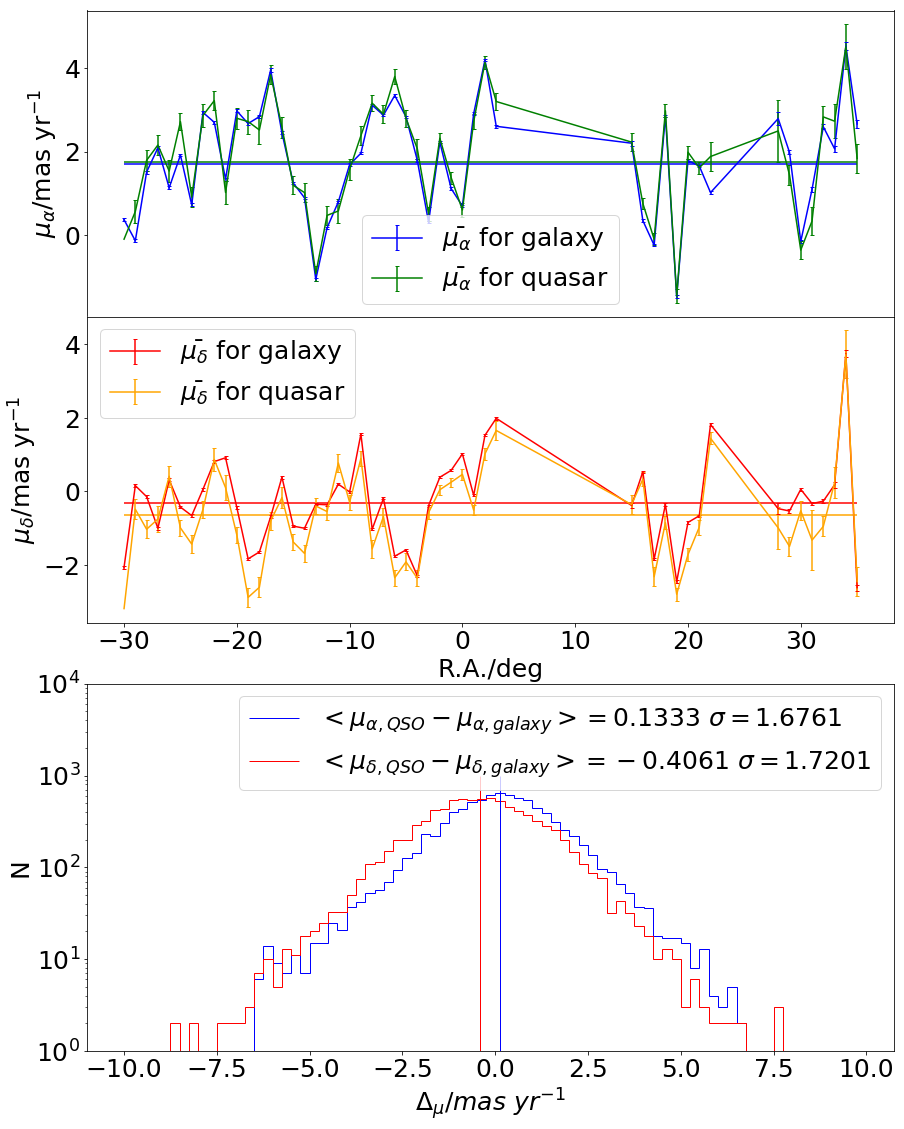

In [204]:
ax=plt.figure(figsize=(14,17))
ax.add_axes([0.1,0.7,0.8,0.25])
#plt.title(r'$Angular offset per year versus R.A. by quasars and galaxies',fontsize=25)
plt.hlines(np.mean(mg.pmra_r),np.min(xm),np.max(xm),color='blue')
plt.hlines(np.mean(qcr.pmra_r),np.min(xm),np.max(xm),color='green')
plt.errorbar(xm3,ram3,yerr=rae3,fmt='-',capsize=2,color='blue',label=r'$\bar{\mu_{\alpha}}$ for galaxy')
plt.errorbar(xm3,ram23,yerr=rae23,fmt='-',capsize=2,color='green',label=r'$\bar{\mu_{\alpha}}$ for quasar')
plt.legend()
plt.xlim()
plt.ylabel(r'$\mu_{\alpha}/\mathrm{mas\ yr^{-1}}$')
ax.add_axes([0.1,0.45,0.8,0.25])
plt.hlines(np.mean(mg.pmdec_r),np.min(xm),np.max(xm),color='red')
plt.hlines(np.mean(qcr.pmdec_r),np.min(xm),np.max(xm),color='orange')
plt.errorbar(xm3,decm3,yerr=dece3,fmt='-',capsize=2,color='red',label=r'$\bar{\mu_{\delta}}$ for galaxy')
plt.errorbar(xm3,decm23,yerr=dece23,fmt='-',capsize=2,color='orange',label=r'$\bar{\mu_{\delta}}$ for quasar')
plt.legend()
plt.xlabel('R.A./deg')
plt.ylabel(r'$\mu_{\delta}/\mathrm{mas\ yr^{-1}}$')

ax.add_axes([0.1,0.1,0.8,0.3])
bins=np.arange(-10,10,0.25)
plt.hist(qcr.pmra_cl_r,bins=bins,histtype='step',color='blue')
plt.hist(qcr.pmdec_cl_r,bins=bins,histtype='step',color='red')
plt.yscale('log')
plt.vlines(np.mean(qcr.pmra_cl_r),0,1e3,linewidth=1,color='blue',label=r'$<\mu_{\alpha,QSO}-\mu_{\alpha,galaxy}>=%0.4f\ \sigma=%0.4f$'%(np.mean(qcr.pmra_cl_r),np.std(qcr.pmra_cl_r)))
plt.vlines(np.mean(qcr.pmdec_cl_r),0,1e3,linewidth=1,color='red',label=r'$<\mu_{\delta,QSO}-\mu_{\delta,galaxy}>=%0.4f\ \sigma=%0.4f$'%(np.mean(qcr.pmdec_cl_r),np.std(qcr.pmdec_cl_r)))
plt.ylim([1,1e4])
plt.legend()
plt.title('')
plt.ylabel('N')
plt.xlabel(r'$\Delta_\mu/mas\ yr^{-1}$')
plt.savefig('/Users/tianqiu/Downloads/QSO_G/r.png')

In [218]:
Znum1.iloc[10,200],Znum2.iloc[10,200],Znum3.iloc[10,200]

(60, 61, 61)

In [219]:
Zra1.iloc[10,200],Zra2.iloc[10,200],Zra3.iloc[10,200]

(8.940585598152609, 3.563215328422434, 3.673945997971554)

In [213]:
Zra1.iloc[10,100],Zra2.iloc[10,100],Zra3.iloc[10,100]

(4.872744501912031, 3.750584809784993, 3.523660347546471)

In [208]:
Zra1.iloc[10,10],Zra2.iloc[10,10],Zra3.iloc[10,10]

(9.642379989652591, 7.073973399324618, 7.082318869117587)

In [209]:
Zra1.iloc[20,20],Zra2.iloc[20,20],Zra3.iloc[20,20]

(0.3812363048147256, -0.13873433254529766, 0.9165157246822314)

In [210]:
Zra1.iloc[30,30],Zra2.iloc[30,30],Zra3.iloc[30,30]

(-2.366824962343404, -2.130097347899421, -0.9777089180226775)

In [211]:
Zra1.iloc[40,40],Zra2.iloc[40,40],Zra3.iloc[40,40]

(4.021250232990656, 1.792939439538975, 3.181344581542249)

In [230]:
mg.iloc[10].r_sdsscentroid_ra,mg.iloc[10].i_sdsscentroid_ra

(-29.90641393677714, -29.90641393677714)

# new

## g

In [29]:
#clip
def calc_cov(mc):
    if mc.shape[0]==2 and mc.shape[1]!=2:
        mc=mc.T
    cov=np.cov(mc.T)
    return cov
def clip(t):
    l=[]
    mx2=np.array([t.pmra_g,t.pmdec_g])
    mx2=mx2.T
    for k,y in enumerate(mx2):
        cov=calc_cov(mx2)
        if (y-mx2.mean(0)).dot(np.linalg.inv(cov)).dot(y-mx2.mean(0))<11.8:
            l.append(k)
    return t.iloc[l]

In [31]:
x=np.arange(-30,36.05,0.05)#1320
y=np.arange(-1.25,1.3,0.05)#50
def grid(j):#for i in range(len(x)-1): #rows, dec
    Z3=[]
    print(j)
    for i in range(len(x)-1): #columns, ra
        #print(j,i)
        t=mg[(mg.i_sdsscentroid_ra<x[i+1])&(mg.i_sdsscentroid_ra>x[i])&(mg.i_sdsscentroid_dec>y[j])&(mg.i_sdsscentroid_dec<y[j+1])]
        if (len(t)==0)|(len(t)==1):
            tem=t
        else:
            tem=clip(t)#clip 3 sigma for each grid
        Z3.append(tem)
    print(j,'-')
    return Z3

In [32]:
pool1=mp.Pool(12)
data1=pool1.map(grid,range(len(y)-1))
pool1.close()

10
8
12
18
6
2
16
20
4
0
22
14
0 -
1
18 -
19
20 -
21
16 -
17
4 -
2 -
5
3
10 -
11
22 -
23
14 -
15
6 -
7
12 -
13
8 -
9
1 -
19 -
24
17 -
21 -
5 -
26
3 -
11 -
23 -
15 -
13 -
7 -
9 -
28
30
32
34
36
38
40
42
44
46
24 -
25
26 -
27
32 -
33
30 -
31
28 -
29
34 -
35
36 -
37
38 -
39
42 -
43
40 -
41
44 -
45
46 -
47
25 -
27 -
48
33 -
31 -
35 -
29 -
37 -
39 -
43 -
41 -
45 -
47 -
48 -
49
49 -


In [33]:
Zra=[[] for i in range(len(data1))]
Zdec=[[] for i in range(len(data1))]
Zrasem=[[] for i in range(len(data1))]
Zdecsem=[[] for i in range(len(data1))]
Znum=[[] for i in range(len(data1))]
for i in range(len(data1)):
    print(i)
    for j in range(len(data1[i])):
        Znum[i].append(len(data1[i][j]))
        Zra[i].append(np.mean(data1[i][j].pmra_g))
        Zdec[i].append(np.mean(data1[i][j].pmdec_g))
        Zrasem[i].append(stats.sem(data1[i][j].pmra_g))
        Zdecsem[i].append(stats.sem(data1[i][j].pmdec_g))

0


/Users/tianqiu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [34]:
Znum1=pd.DataFrame(Znum)
Zra1=pd.DataFrame(Zra)
Zdec1=pd.DataFrame(Zdec)
Zrasem1=pd.DataFrame(Zrasem)
Zdecsem1=pd.DataFrame(Zdecsem)

## r

In [52]:
#clip
def calc_cov(mc):
    if mc.shape[0]==2 and mc.shape[1]!=2:
        mc=mc.T
    cov=np.cov(mc.T)
    return cov
def clip(t):
    l=[]
    mx2=np.array([t.pmra_r,t.pmdec_r])
    mx2=mx2.T
    for k,y in enumerate(mx2):
        cov=calc_cov(mx2)
        if (y-mx2.mean(0)).dot(np.linalg.inv(cov)).dot(y-mx2.mean(0))<11.8:
            l.append(k)
    return t.iloc[l]

x=np.arange(-30,36.05,0.05)#1320
y=np.arange(-1.25,1.3,0.05)#50
def grid(j):#for i in range(len(x)-1): #rows, dec
    Z3=[]
    print(j)
    for i in range(len(x)-1): #columns, ra
        #print(j,i)
        t=mg[(mg.i_sdsscentroid_ra<x[i+1])&(mg.i_sdsscentroid_ra>x[i])&(mg.i_sdsscentroid_dec>y[j])&(mg.i_sdsscentroid_dec<y[j+1])]
        if (len(t)==0)|(len(t)==1):
            tem=t
        else:
            tem=clip(t)#clip 3 sigma for each grid
        Z3.append(tem)
    print(j,'-')
    return Z3

pool1=mp.Pool(12)
data2=pool1.map(grid,range(len(y)-1))
pool1.close()

Zra2=[[] for i in range(len(data2))]
Zdec2=[[] for i in range(len(data2))]
Zrasem2=[[] for i in range(len(data2))]
Zdecsem2=[[] for i in range(len(data2))]
Znum2=[[] for i in range(len(data2))]
for i in range(len(data2)):
    print(i)
    for j in range(len(data2[i])):
        Znum2[i].append(len(data2[i][j]))
        Zra2[i].append(np.mean(data2[i][j].pmra_r))
        Zdec2[i].append(np.mean(data2[i][j].pmdec_r))
        Zrasem2[i].append(stats.sem(data2[i][j].pmra_r))
        Zdecsem2[i].append(stats.sem(data2[i][j].pmdec_r))
Znum2=pd.DataFrame(Znum2)
Zra2=pd.DataFrame(Zra2)
Zdec2=pd.DataFrame(Zdec2)
Zrasem2=pd.DataFrame(Zrasem2)
Zdecsem2=pd.DataFrame(Zdecsem2)

0
4
2
10
6
8
12
14
16
18
20
22
0 -
1
20 -
2 -
21
3
18 -
19
22 -
16 -
23
17
4 -
5
14 -
15
6 -
7
12 -
13
10 -
11
8 -
9
1 -
21 -
19 -
17 -
5 -
3 -
23 -
15 -
11 -
13 -
7 -
9 -
24
26
28
30
32
34
24 -
25
36
38
26 -
27
40
42
28 -
29
44
30 -
31
46
32 -
33
34 -
35
25 -
48
27 -
36 -
37
29 -
38 -
39
40 -
41
31 -
42 -
43
46 -
44 -
47
45
33 -
35 -
48 -
49
37 -
41 -
39 -
47 -
45 -
43 -
49 -
0


/Users/tianqiu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


## i

In [53]:
#clip
def calc_cov(mc):
    if mc.shape[0]==2 and mc.shape[1]!=2:
        mc=mc.T
    cov=np.cov(mc.T)
    return cov
def clip(t):
    l=[]
    mx2=np.array([t.pmra_i,t.pmdec_i])
    mx2=mx2.T
    for k,y in enumerate(mx2):
        cov=calc_cov(mx2)
        if (y-mx2.mean(0)).dot(np.linalg.inv(cov)).dot(y-mx2.mean(0))<11.8:
            l.append(k)
    return t.iloc[l]

x=np.arange(-30,36.05,0.05)#1320
y=np.arange(-1.25,1.3,0.05)#50
def grid(j):#for i in range(len(x)-1): #rows, dec
    Z3=[]
    print(j)
    for i in range(len(x)-1): #columns, ra
        #print(j,i)
        t=mg[(mg.i_sdsscentroid_ra<x[i+1])&(mg.i_sdsscentroid_ra>x[i])&(mg.i_sdsscentroid_dec>y[j])&(mg.i_sdsscentroid_dec<y[j+1])]
        if (len(t)==0)|(len(t)==1):
            tem=t
        else:
            tem=clip(t)#clip 3 sigma for each grid
        Z3.append(tem)
    print(j,'-')
    return Z3

pool1=mp.Pool(12)
data3=pool1.map(grid,range(len(y)-1))
pool1.close()

Zra3=[[] for i in range(len(data3))]
Zdec3=[[] for i in range(len(data3))]
Zrasem3=[[] for i in range(len(data3))]
Zdecsem3=[[] for i in range(len(data3))]
Znum3=[[] for i in range(len(data3))]
for i in range(len(data3)):
    print(i)
    for j in range(len(data3[i])):
        Znum3[i].append(len(data3[i][j]))
        Zra3[i].append(np.mean(data3[i][j].pmra_r))
        Zdec3[i].append(np.mean(data3[i][j].pmdec_r))
        Zrasem3[i].append(stats.sem(data3[i][j].pmra_r))
        Zdecsem3[i].append(stats.sem(data3[i][j].pmdec_r))
Znum3=pd.DataFrame(Znum3)
Zra3=pd.DataFrame(Zra3)
Zdec3=pd.DataFrame(Zdec3)
Zrasem3=pd.DataFrame(Zrasem3)
Zdecsem3=pd.DataFrame(Zdecsem3)

2
10
18
20
22
14
6
0
16
4
12
8
0 -
1
2 -
3
20 -
21
18 -
19
16 -
17
22 -
23
6 -
4 -
7
5
14 -
12 -
15
13
10 -
11
8 -
9
1 -
21 -
19 -
17 -
24
5 -
23 -
3 -
11 -
13 -
15 -
26
9 -
7 -
28
30
32
34
36
38
40
42
44
46
24 -
25
26 -
27
28 -
29
30 -
31
32 -
33
34 -
35
36 -
37
38 -
39
40 -
41
42 -
43
44 -
45
46 -
47
27 -
48
29 -
25 -
31 -
33 -
35 -
37 -
39 -
41 -
43 -
45 -
47 -
48 -
49
49 -
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [10]:
ms=m[(m.i_extendedness_value==0)]

In [21]:
ms=ms[pd.notna(ms.pmdec_g)]
ms=ms[pd.notna(ms.pmdec_r)]
ms=ms[pd.notna(ms.pmdec_i)]
ms=ms[pd.notna(ms.pmra_g)]
ms=ms[pd.notna(ms.pmra_r)]
ms=ms[pd.notna(ms.pmra_i)]

In [22]:
len(ms)

629241

In [35]:
x=np.arange(-30,36.05,0.05)#1320
y=np.arange(-1.25,1.3,0.05)#50
def cali_s(i):#for i in range(len(x)-1): #columns, ra
    print(i)
    t=[]
    for j in range(len(y)-1): #rows, dec
        tt=ms[(ms.i_sdsscentroid_ra<x[i+1])&(ms.i_sdsscentroid_ra>x[i])&(ms.i_sdsscentroid_dec>y[j])&(ms.i_sdsscentroid_dec<y[j+1])].copy()
        if len(tt)==0:
            continue
        tt['pmra_cl_g']=tt.pmra_g-Zra1.iloc[j,i]
        tt['pmdec_cl_g']=tt.pmdec_g-Zdec1.iloc[j,i]
        t.append(tt)
    if len(t)!=0:
        ttt=pd.concat(t)
        print(i,'-')
        return ttt
    else:
        print(i,'-0')
        return tt
            

In [37]:
pool1=mp.Pool(12)
data=pool1.map(cali_s,range(len(x)-1))
pool1.close()

0
84
28
56
112
140
168
196
224
252
280
308
140 -
141
56 -
57
0 -
28 -
112 -
196 -
29
1
113
197
84 -
252 -
168 -
253
85
169
224 -
225
280 -
281
308 -
309
141 -
142
85 -
253 -
1 -
197 -
57 -
254
29 -
113 -
169 -
58
86
309 -
2
114
30
198
225 -
170
226
310
281 -
282
142 -
143
2 -
3
86 -
87
254 -
198 -
255
199
30 -
31
58 -
59
226 -
227
170 -
114 -
310 -
115
171
311
282 -
283
143 -
144
255 -
256
31 -
87 -
32
88
3 -
4
59 -
60
199 -
200
227 -
228
311 -
312
283 -
284
171 -
172
115 -
116
144 -
145
60 -
32 -
61
33
88 -
256 -
257
89
312 -
313
4 -
5
228 -
229
200 -
201
284 -
285
172 -
116 -
173
117
145 -
146
89 -
90
5 -
6
61 -
33 -
257 -
62
34
258
313 -
229 -
314
230
201 -
202
285 -
286
173 -
174
117 -
118
146 -
147
90 -
91
6 -
7
62 -
258 -
34 -
230 -
259
63
35
231
202 -
314 -
174 -
203
315
175
286 -
287
118 -
119
147 -
148
91 -
7 -
92
8
231 -
232
35 -
203 -
36
204
259 -
260
63 -
287 -
175 -
315 -
119 -
64
288
316
176
120
148 -
149
92 -
93
8 -
9
232 -
233
204 -
205
260 -
176 -
261
177
36 -
37
64 -


743
881 -0
882
714 -0
715
853 -0
854
934 -
935
770 -0
771
909 -0
910
962 -
963
798 -0
799
990 -
991
826 -0
827
686 -0
687
743 -0
744
882 -0
883
854 -0
715 -0
716
855
771 -0
772
910 -0
911
799 -0
800
935 -
936
963 -
964
827 -0
828
991 -
992
687 -0
688
744 -0
745
883 -0
884
716 -0
855 -0
717
856
772 -0
773
911 -
912
800 -0
801
828 -0
829
936 -
937
688 -0
964 -
689
965
745 -0
746
884 -0
885
992 -
993
717 -0
718
856 -0
857
773 -0
774
912 -
913
801 -0
802
829 -0
830
689 -0
690
746 -0
747
937 -
938
885 -0
886
965 -
966
718 -0
719
857 -0
858
774 -0
775
993 -
994
802 -0
803
913 -
914
830 -0
831
690 -0
691
747 -0
748
886 -0
887
719 -0
720
858 -0
859
938 -
939
775 -0
776
966 -
967
803 -0
804
994 -
995
831 -0
832
914 -
915
691 -0
692
748 -0
749
887 -0
888
720 -0
859 -0
776 -0
721
860
777
939 -
940
804 -0
805
967 -
968
832 -0
833
915 -
916
692 -0
693
995 -
996
749 -0
750
888 -0
889
777 -0
778
721 -0
722
860 -0
861
805 -0
806
833 -0
834
940 -
941
693 -0
968 -
694
969
750 -0
751
916 -
917
889 -0
890

In [38]:
ms=pd.concat(data)

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [47]:
len(ms)

629584

In [48]:
ms=ms[pd.notna(ms.pmdec_cl_g)]

In [49]:
len(ms)

629234

In [50]:
ms=ms[pd.notna(ms.pmdec_cl_i)]

AttributeError: 'DataFrame' object has no attribute 'pmdec_cl_i'

# another check

In [79]:
ms=pd.read_csv('../Downloads/catalog/diffraction/matchedstar.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [93]:
gr=mg.g_psfflux_mag-mg.r_psfflux_mag
len(mg[(gr>0)&(gr<1.8)])/len(mg)

0.9300433801458482

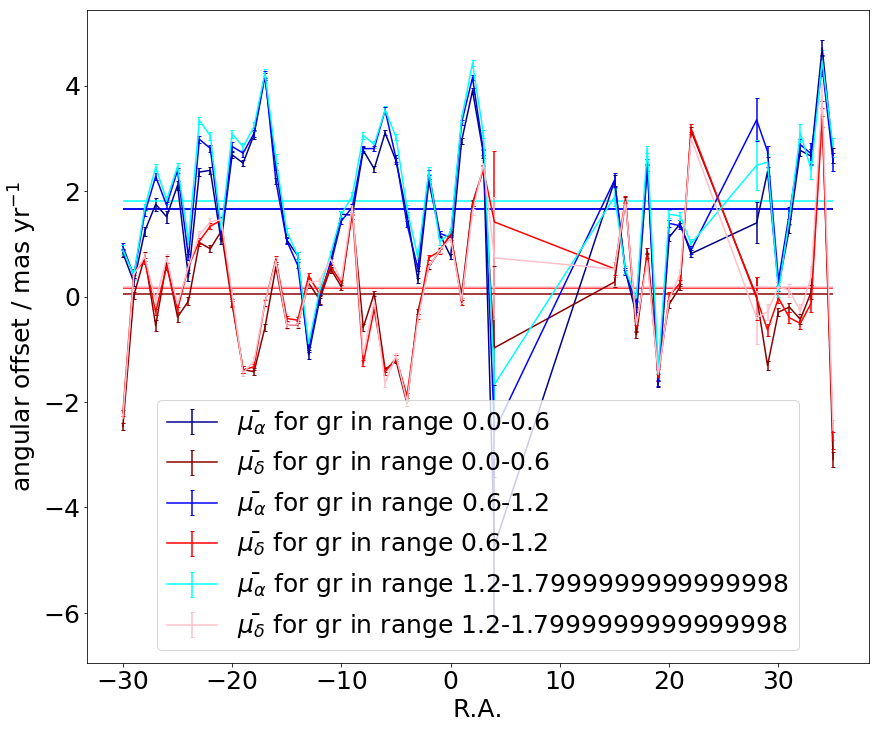

In [81]:
plt.figure(figsize=(14,12))
gr=mg.g_psfflux_mag-mg.r_psfflux_mag
c1=['darkblue','blue','cyan']
c2=['darkred','red','pink']
for i in range(3):
    t=mg[(gr>i*0.6)&(gr<i*0.6+0.6)]
    xm1=[]
    ram1=[]
    decm1=[]
    rae1=[]
    dece1=[]       
    for j in range(-30,37):
        t1=t[(t.i_sdsscentroid_ra>j)&(t.i_sdsscentroid_ra<=(1+j))]
        if t1.empty:
            continue
        xm1.append(j)    
        ram1.append(np.mean(t1.pmra_i))
        decm1.append(np.mean(t1.pmdec_i))
        rae1.append(stats.sem(t1.pmra_i))
        dece1.append(stats.sem(t1.pmdec_i))
    plt.errorbar(xm1,ram1,yerr=rae1,fmt='-',capsize=2,color=c1[i],label=r'$\bar{\mu_{\alpha}}$ for g-r in range '+str(i*0.6)+'-'+str(i*0.6+0.6))
    plt.errorbar(xm1,decm1,yerr=dece1,fmt='-',capsize=2,color=c2[i],label=r'$\bar{\mu_{\delta}}$ for g-r in range '+str(i*0.6)+'-'+str(i*0.6+0.6))
    plt.hlines(np.mean(t.pmra_i),np.min(xm1),np.max(xm1),color=c1[i])
    plt.hlines(np.mean(t.pmdec_i),np.min(xm1),np.max(xm1),color=c2[i])
plt.legend()
plt.xlabel('R.A.')
plt.ylabel('angular offset / mas yr$^{-1}$')
plt.savefig('../Documents/final/check/dcr1.png')

In [68]:
gr=ms.g_psfflux_mag-ms.r_psfflux_mag
mb=ms[]

In [96]:
ms.to_csv('../Downloads/catalog/diffraction/matchedstar.csv',index=False)

Text(0, 0.5, 'proper motion / mas yr$^{-1}$')

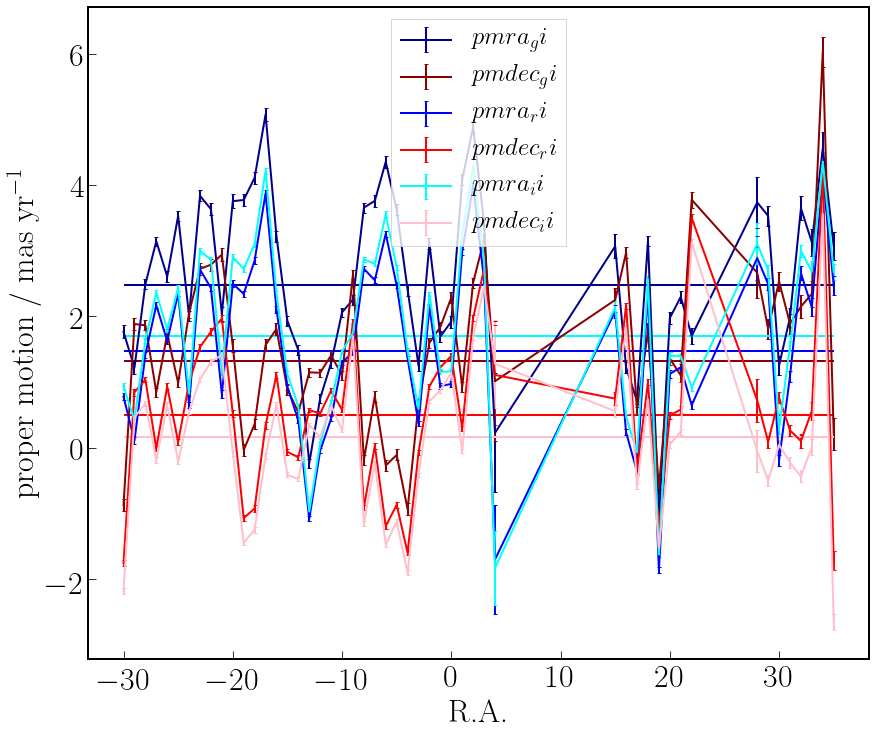

In [49]:

plt.figure(figsize=(14,12))
c1=['darkblue','blue','cyan']
c2=['darkred','red','pink']
a1=['pmra_gi','pmra_ri','pmra_ii']
a2=['pmdec_gi','pmdec_ri','pmdec_ii']
for i in range(3):
    t=mg[(mg.i_psfflux_mag<24)&(mg.g_psfflux_mag-mg.r_psfflux_mag>0.6)]
    xm1=[]
    ram1=[]
    decm1=[]
    rae1=[]
    dece1=[]       
    for j in range(-30,37):
        t1=t[(t.i_sdsscentroid_ra>j)&(t.i_sdsscentroid_ra<=(1+j))]
        if t1.empty:
            continue
        xm1.append(j)    
        ram1.append(np.mean(t1[a1[i]]))
        decm1.append(np.mean(t1[a2[i]]))
        rae1.append(stats.sem(t1[a1[i]]))
        dece1.append(stats.sem(t1[a2[i]]))
    plt.errorbar(xm1,ram1,yerr=rae1,fmt='-',capsize=2,color=c1[i],label=r'$'+a1[i]+'$')
    plt.errorbar(xm1,decm1,yerr=dece1,fmt='-',capsize=2,color=c2[i],label=r'$'+a2[i]+'$')
    plt.hlines(np.mean(t[a1[i]]),np.min(xm1),np.max(xm1),color=c1[i])
    plt.hlines(np.mean(t[a2[i]]),np.min(xm1),np.max(xm1),color=c2[i])
plt.legend()
plt.xlabel('R.A.')
plt.ylabel('proper motion / mas yr$^{-1}$')
#plt.savefig('../Documents/final/check/dcr2.png')

Text(0, 0.5, 'proper motion / mas yr$^{-1}$')

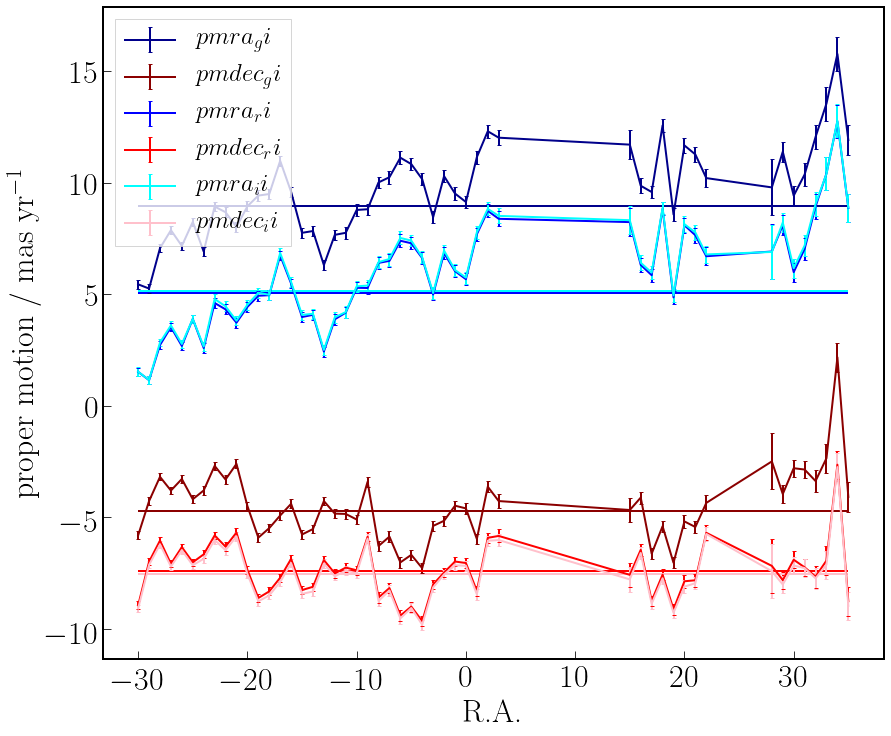

In [54]:

plt.figure(figsize=(14,12))
c1=['darkblue','blue','cyan']
c2=['darkred','red','pink']
a1=['pmra_gi','pmra_ri','pmra_ii']
a2=['pmdec_gi','pmdec_ri','pmdec_ii']
for i in range(3):
    t=ms[(ms.i_psfflux_mag<24)&(ms.g_psfflux_mag-ms.r_psfflux_mag<0.6)]
    xm1=[]
    ram1=[]
    decm1=[]
    rae1=[]
    dece1=[]       
    for j in range(-30,37):
        t1=t[(t.i_sdsscentroid_ra>j)&(t.i_sdsscentroid_ra<=(1+j))]
        if t1.empty:
            continue
        xm1.append(j)    
        ram1.append(np.mean(t1[a1[i]]))
        decm1.append(np.mean(t1[a2[i]]))
        rae1.append(stats.sem(t1[a1[i]]))
        dece1.append(stats.sem(t1[a2[i]]))
    plt.errorbar(xm1,ram1,yerr=rae1,fmt='-',capsize=2,color=c1[i],label=r'$'+a1[i]+'$')
    plt.errorbar(xm1,decm1,yerr=dece1,fmt='-',capsize=2,color=c2[i],label=r'$'+a2[i]+'$')
    plt.hlines(np.mean(t[a1[i]]),np.min(xm1),np.max(xm1),color=c1[i])
    plt.hlines(np.mean(t[a2[i]]),np.min(xm1),np.max(xm1),color=c2[i])
plt.legend()
plt.xlabel('R.A.')
plt.ylabel('proper motion / mas yr$^{-1}$')
#plt.savefig('../Documents/final/check/dcr2.png')

Text(0, 0.5, 'proper motion / mas yr$^{-1}$')

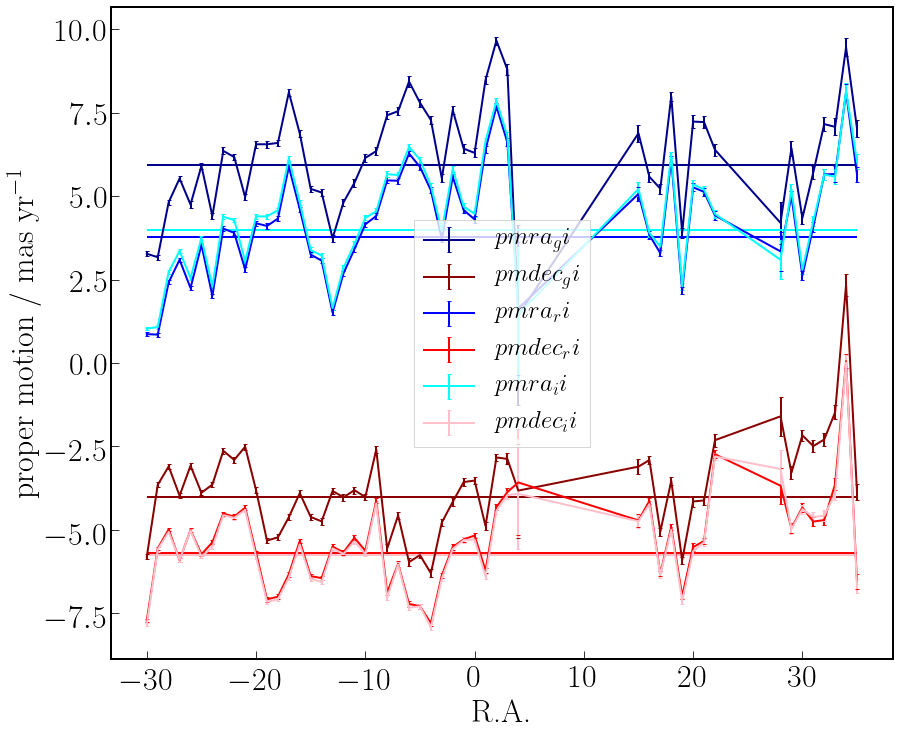

In [85]:

plt.figure(figsize=(14,12))
c1=['darkblue','blue','cyan']
c2=['darkred','red','pink']
a1=['pmra_gi','pmra_ri','pmra_ii']
a2=['pmdec_gi','pmdec_ri','pmdec_ii']
for i in range(3):
    t=ms[(ms.i_psfflux_mag<24)]#&(ms.g_psfflux_mag-ms.r_psfflux_mag<0.6)]
    xm1=[]
    ram1=[]
    decm1=[]
    rae1=[]
    dece1=[]       
    for j in range(-30,37):
        t1=t[(t.i_sdsscentroid_ra>j)&(t.i_sdsscentroid_ra<=(1+j))]
        if t1.empty:
            continue
        xm1.append(j)    
        ram1.append(np.mean(t1[a1[i]]))
        decm1.append(np.mean(t1[a2[i]]))
        rae1.append(stats.sem(t1[a1[i]]))
        dece1.append(stats.sem(t1[a2[i]]))
    plt.errorbar(xm1,ram1,yerr=rae1,fmt='-',capsize=2,color=c1[i],label=r'$'+a1[i]+'$')
    plt.errorbar(xm1,decm1,yerr=dece1,fmt='-',capsize=2,color=c2[i],label=r'$'+a2[i]+'$')
    plt.hlines(np.mean(t[a1[i]]),np.min(xm1),np.max(xm1),color=c1[i])
    plt.hlines(np.mean(t[a2[i]]),np.min(xm1),np.max(xm1),color=c2[i])
plt.legend()
plt.xlabel('R.A.')
plt.ylabel('proper motion / mas yr$^{-1}$')
#plt.savefig('../Documents/final/check/dcr2.png')

Text(0, 0.5, 'proper motion / mas yr$^{-1}$')

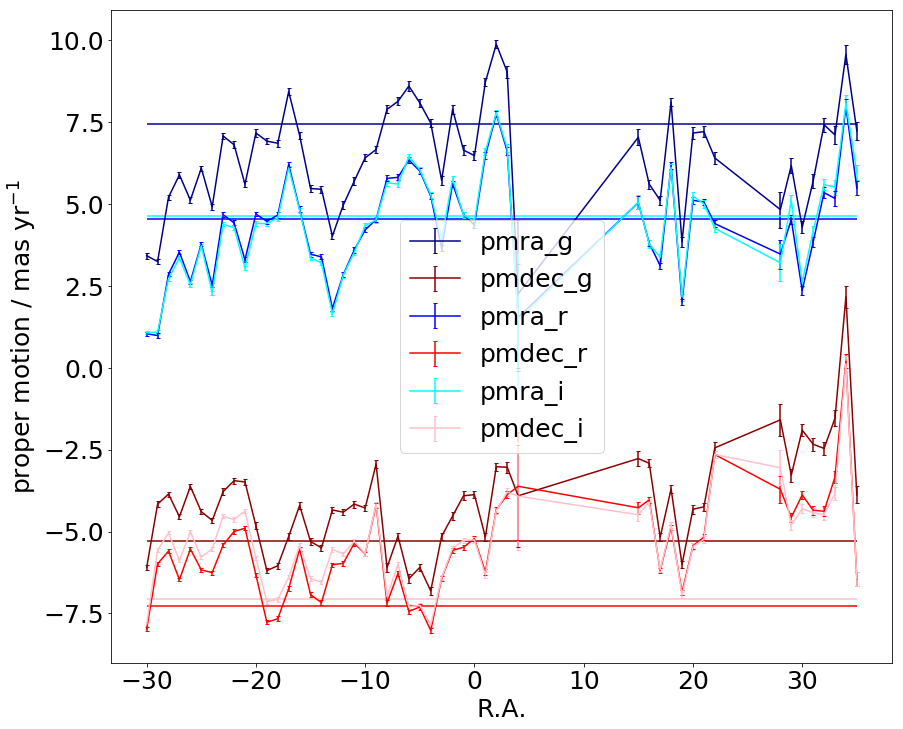

In [98]:

plt.figure(figsize=(14,12))
c1=['darkblue','blue','cyan']
c2=['darkred','red','pink']
a1=['pmra_g','pmra_r','pmra_i']
a2=['pmdec_g','pmdec_r','pmdec_i']
for i in range(3):
#    t=ms[(gr>i*0.6)&(gr<i*0.6+0.6)]
    xm1=[]
    ram1=[]
    decm1=[]
    rae1=[]
    dece1=[]       
    for j in range(-30,37):
        t1=ms[(ms.i_sdsscentroid_ra>j)&(ms.i_sdsscentroid_ra<=(1+j))]
        if t1.empty:
            continue
        xm1.append(j)    
        ram1.append(np.mean(t1[a1[i]]))
        decm1.append(np.mean(t1[a2[i]]))
        rae1.append(stats.sem(t1[a1[i]]))
        dece1.append(stats.sem(t1[a2[i]]))
    plt.errorbar(xm1,ram1,yerr=rae1,fmt='-',capsize=2,color=c1[i],label=a1[i] )
    plt.errorbar(xm1,decm1,yerr=dece1,fmt='-',capsize=2,color=c2[i],label=a2[i])
    plt.hlines(np.mean(t[a1[i]]),np.min(xm1),np.max(xm1),color=c1[i])
    plt.hlines(np.mean(t[a2[i]]),np.min(xm1),np.max(xm1),color=c2[i])
plt.legend()
plt.xlabel('R.A.')
plt.ylabel('proper motion / mas yr$^{-1}$')
plt.savefig('../Documents/final/check/dcr2.png')

# comparison with gaia

In [55]:
ms=pd.read_csv('../Downloads/catalog/diffraction/matchedstar.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
mg=pd.read_csv('../Downloads/catalog/diffraction/matchedgalaxy.csv')

In [17]:
g=pd.read_csv('../Downloads/catalog/diffraction/matchedgaia.csv')

In [5]:
#clip
def calc_cov(mc):
    if mc.shape[0]==2 and mc.shape[1]!=2:
        mc=mc.T
    cov=np.cov(mc.T)
    return cov
def clip(t):
    l=[]
    mx2=np.array([t.pmra_gi,t.pmdec_gi])
    mx2=mx2.T
    for k,y in enumerate(mx2):
        cov=calc_cov(mx2)
        if (y-mx2.mean(0)).dot(np.linalg.inv(cov)).dot(y-mx2.mean(0))<11.8:
            l.append(k)
    return t.iloc[l]

In [6]:
x=np.arange(-30,36.05,0.05)#1320
y=np.arange(-1.25,1.3,0.05)#50
def grid(j):#for i in range(len(x)-1): #rows, dec
    Z3=[]
    print(j)
    for i in range(len(x)-1): #columns, ra
        #print(j,i)
        t=mg[(mg.i_sdsscentroid_ra<x[i+1])&(mg.i_sdsscentroid_ra>x[i])&(mg.i_sdsscentroid_dec>y[j])&(mg.i_sdsscentroid_dec<y[j+1])]
        if (len(t)==0)|(len(t)==1):
            tem=t
        else:
            tem=clip(t)#clip 3 sigma for each grid
        Z3.append(tem)
    print(j,'-')
    return Z3

In [7]:
pool1=mp.Pool(12)
data1=pool1.map(grid,range(len(y)-1))
pool1.close()

2
0
10
4
8
12
14
6
16
18
20
22
4 -
5
20 -
21
18 -
19
0 -
1
16 -
17
22 -
23
10 -
2 -
11
3
8 -
9
6 -
7
12 -
13
14 -
15
21 -
19 -
1 -
5 -
17 -
24
3 -
11 -
23 -
7 -
9 -
26
13 -
15 -
28
30
32
34
36
38
40
42
44
46
24 -
25
28 -
29
26 -
27
30 -
31
32 -
33
34 -
35
36 -
37
38 -
39
40 -
41
42 -
43
44 -
45
46 -
47
25 -
48
29 -
27 -
31 -
33 -
35 -
37 -
41 -
39 -
43 -
45 -
47 -
48 -
49
49 -


In [9]:
Zra=[[] for i in range(len(data1))]
Zdec=[[] for i in range(len(data1))]
Zrasem=[[] for i in range(len(data1))]
Zdecsem=[[] for i in range(len(data1))]
Znum=[[] for i in range(len(data1))]
for i in range(len(data1)):
    print(i)
    for j in range(len(data1[i])):
        Znum[i].append(len(data1[i][j]))
        Zra[i].append(np.mean(data1[i][j].pmra_gi))
        Zdec[i].append(np.mean(data1[i][j].pmdec_gi))
        Zrasem[i].append(stats.sem(data1[i][j].pmra_gi))
        Zdecsem[i].append(stats.sem(data1[i][j].pmdec_gi))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [10]:
Znum1=pd.DataFrame(Znum)
Zra1=pd.DataFrame(Zra)
Zdec1=pd.DataFrame(Zdec)
Zrasem1=pd.DataFrame(Zrasem)
Zdecsem1=pd.DataFrame(Zdecsem)

In [38]:

Znum=pd.read_csv('../Downloads/catalog/final/calibration/table/Znum.csv')
Zra=pd.read_csv('../Downloads/catalog/final/calibration/table/Zra.csv')
Zdec=pd.read_csv('../Downloads/catalog/final/calibration/table/Zdec.csv')
Zrasem=pd.read_csv('../Downloads/catalog/final/calibration/table/Zrasem.csv')
Zdecsem=pd.read_csv('../Downloads/catalog/final/calibration/table/Zdecsem.csv')

In [26]:
x=np.arange(-30,36.05,0.05)#1320
y=np.arange(-1.25,1.3,0.05)#50
def cali_s(i):#for i in range(len(x)-1): #columns, ra
    print(i)
    t=[]
    for j in range(len(y)-1): #rows, dec
        tt=g[(g.i_sdsscentroid_ra<x[i+1])&(g.i_sdsscentroid_ra>x[i])&(g.i_sdsscentroid_dec>y[j])&(g.i_sdsscentroid_dec<y[j+1])].copy()
        if len(tt)==0:
            continue
        tt['pmra_cl_gi']=tt.pmra_gi-Zra1.iloc[j,i]
        tt['pmdec_cl_gi']=tt.pmdec_gi-Zdec1.iloc[j,i]
        t.append(tt)
    if len(t)!=0:
        ttt=pd.concat(t)
        print(i,'-',len(ttt))
        return ttt
    else:
        print(i,'-0')
        return tt
            

In [29]:
pool1=mp.Pool(12)
data2=pool1.map(cali_s,range(len(x)-1))
pool1.close()

28
84
56
0
168
196
252
140
112
280
224
308
0 - 105
1
28 - 168
29
140 - 160
141
56 - 201
112 - 183
57
113
168 - 133
169
84 - 214
85
196 - 136
197
224 - 165
225
280 - 160
281
252 - 187
253
308 - 150
309
1 - 74
2
29 - 217
30
141 - 147
142
113 - 199
114
85 - 227
86
57 - 181
58
169 - 161
225 - 125
197 - 157
170
226
198
281 - 167
253 - 177
282
254
309 - 165
310
2 - 104
3
30 - 182
31
142 - 144
143
114 - 183
115
58 - 215
170 - 141
171
59
226 - 158
227
86 - 202
87
198 - 135
199
282 - 185
283
254 - 142
255
310 - 165
311
3 - 134
4
31 - 177
32
143 - 130
144
115 - 149
116
59 - 189
87 - 190
88
60
171 - 144
172
199 - 146
200
227 - 136
228
283 - 188
255 - 160
284
256
311 - 148
312
4 - 128
5
144 - 119
145
32 - 197
116 - 177
33
117
60 - 160
61
200 - 137
201
172 - 162
88 - 199
173
89
228 - 145
229
284 - 180
285
256 - 155
257
312 - 153
313
5 - 124
6
145 - 118
146
33 - 217
34
117 - 164
118
89 - 152
90
201 - 152
202
61 - 201
173 - 163
62
174
229 - 148
230
257 - 165
258
285 - 187
286
6 - 121
7
313 - 152
314


498 - 104
499
553 - 158
554
470 - 88
471
609 - 112
610
442 - 116
443
386 - 155
414 - 139
526 - 104
527
415
387
638 - 114
639
358 - 177
359
667 - 75
668
499 - 109
582 - 114
500
583
471 - 96
472
554 - 131
555
610 - 142
611
443 - 150
444
387 - 150
388
527 - 125
528
415 - 145
416
639 - 98
640
359 - 174
360
668 - 82
669
500 - 105
501
583 - 112
472 - 106
584
473
611 - 104
555 - 149
612
556
444 - 147
445
388 - 167
389
528 - 126
529
416 - 135
417
640 - 107
641
669 - 115
670
360 - 158
361
501 - 112
473 - 114
584 - 126
474
502
585
556 - 148
557
612 - 137
613
445 - 122
446
417 - 127
418
670 - 70
641 - 108
389 - 166
671
642
390
529 - 115
530
361 - 155
362
502 - 108
503
474 - 120
475
613 - 145
585 - 143
614
586
557 - 137
558
446 - 136
447
671 - 81
672
642 - 98
418 - 130
643
419
530 - 147
531
390 - 174
391
362 - 182
363
503 - 114
475 - 119
700
614 - 142
672 - 76
586 - 122
558 - 138
615
673
587
447 - 124
559
728
756
643 - 91
419 - 127
784
812
531 - 128
391 - 136
840
868
728 -0
729
700 -0
701
363 - 19

1264
1247 - 32
1248
1319 -0
1291 - 9
1292
1228 - 42
1200 - 79
1229
1201
1057 - 30
1058
1030 - 113
1031
1264 - 9
1265
1248 - 29
1249
1292 - 19
1293
1229 - 40
1230
1058 - 25
1059
1201 - 65
1202
1265 - 19
1031 - 108
1266
1032
1249 - 34
1250
1059 - 4
1060
1293 - 27
1294
1230 - 41
1231
1202 - 46
1203
1266 - 17
1267
1060 -0
1250 - 29
1061
1251
1294 - 19
1295
1032 - 105
1033
1231 - 41
1203 - 63
1267 - 27
1268
1061 -0
1062
1251 - 24
1252
1295 - 23
1296
1268 - 31
1062 -0
1063
1269
1033 - 128
1034
1252 - 25
1253
1296 - 21
1297
1063 -0
1269 - 23
1270
1253 - 26
1254
1297 - 20
1298
1034 - 96
1035
1270 - 24
1271
1254 - 21
1255
1298 - 14
1299
1271 - 27
1272
1035 - 112
1255 - 27
1256
1299 - 20
1300
1272 - 32
1273
1256 - 29
1257
1300 - 35
1301
1273 - 17
1274
1257 - 35
1258
1301 - 23
1302
1274 - 32
1275
1258 - 28
1259
1302 - 33
1303
1275 - 31
1276
1259 - 12
1303 - 25
1304
1276 - 26
1277
1304 - 30
1305
1277 - 12
1278
1305 - 30
1306
1278 - 26
1279
1306 - 36
1307
1279 - 27
1280
1307 - 21
1308
1280 - 25
128

In [30]:
g=pd.concat(data2)

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [33]:
# given vectors x and y, fit medians in bins from xMin to xMax, with Nbin steps,
# and return xBin, medianBin, medianErrBin 
def fitMedians(x, y, xMin, xMax, Nbin, verbose=1): 

    # first generate bins
    xEdge = np.linspace(xMin, xMax, (Nbin+1)) 
    xBin = np.linspace(0, 1, Nbin)
    nPts = 0*np.linspace(0, 1, Nbin)
    medianBin = 0*np.linspace(0, 1, Nbin)
    sigGbin = [-1+0*np.linspace(0, 1, Nbin),-1+0*np.linspace(0, 1, Nbin)] #lower and upper
    for i in range(0, Nbin): 
        xBin[i] = 0.5*(xEdge[i]+xEdge[i+1]) 
        yAux1 = y[(x>xEdge[i])&(x<=xEdge[i+1])]
#        yErr = ye[(x>xEdge[i])&(x<=xEdge[i+1])]
#        yErr = yErr[(yAux1<np.percentile(yAux1,99.85))&(yAux1>np.percentile(yAux1,0.15))]#3sigma clipping
        if (yAux1.size > 0):
            yAux = yAux1#[(yAux1<np.percentile(yAux1,99.85))&(yAux1>np.percentile(yAux1,0.15))]#3sigma clipping
            nPts[i] = yAux.size
            medianBin[i] = np.median(yAux) #mean
            # robust estimate of standard deviation: 0.741*(q75-q50),0.741*(q50-q25)
            sigmaG1 = 0.741*(np.percentile(yAux,75)-np.percentile(yAux,50))*2
            sigmaG2 = 0.741*(np.percentile(yAux,50)-np.percentile(yAux,25))*2
            # uncertainty of the median: sqrt(pi/2)*st.dev/sqrt(N)
            sigGbin[0][i] = np.sqrt(np.pi/2)*sigmaG2/np.sqrt(nPts[i])
            sigGbin[1][i] = np.sqrt(np.pi/2)*sigmaG1/np.sqrt(nPts[i])
        else:
            nPts[i] = 0 
            medianBin[i] = np.nan
            sigGbin[0][i] = np.nan
            sigGbin[1][i] = np.nan 
            # nPts[i], medianBin[i], sigGBin[i] = 0 
        
    if (verbose):
        print('median:', np.median(medianBin[nPts>0]))

    return xBin, nPts, medianBin, sigGbin

In [34]:
ra=g.i_sdsscentroid_ra
pmra1=g.pmra_2
pmra2=g.pmra_cl_gi
pmra3=g.pmra_cl_gi-g.pmra_2
pmdec1=g.pmdec_2
pmdec2=g.pmdec_cl_gi
pmdec3=g.pmdec_cl_gi-g.pmdec_2

x1Bin1, n1Pts1, m1edianBin1, s1igGbin1 = fitMedians(ra, pmra1, -30.5, 35.5, 66, 0)#gaia
x1Bin2, n1Pts2, m1edianBin2, s1igGbin2 = fitMedians(ra, pmra2, -30.5, 35.5, 66, 0)#HSC-S82
#difference
s1igGbin3=s1igGbin1
x1Bin3 = x1Bin1
m1edianBin3=m1edianBin2-m1edianBin1
s1igGbin3[0]=np.sqrt(s1igGbin2[0]**2+s1igGbin1[0]**2)
s1igGbin3[1]=np.sqrt(s1igGbin2[1]**2+s1igGbin1[1]**2)

x1Bin11, n1Pts11, m1edianBin11, s1igGbin11 = fitMedians(ra, pmdec1, -30.5, 35.5, 66, 0)
x1Bin21, n1Pts21, m1edianBin21, s1igGbin21 = fitMedians(ra, pmdec2, -30.5, 35.5, 66, 0)
#difference
x1Bin31 = x1Bin11
s1igGbin31=s1igGbin11
m1edianBin31=m1edianBin21-m1edianBin11
s1igGbin31[0]=np.sqrt(s1igGbin21[0]**2+s1igGbin11[0]**2)
s1igGbin31[1]=np.sqrt(s1igGbin21[1]**2+s1igGbin11[1]**2)
    

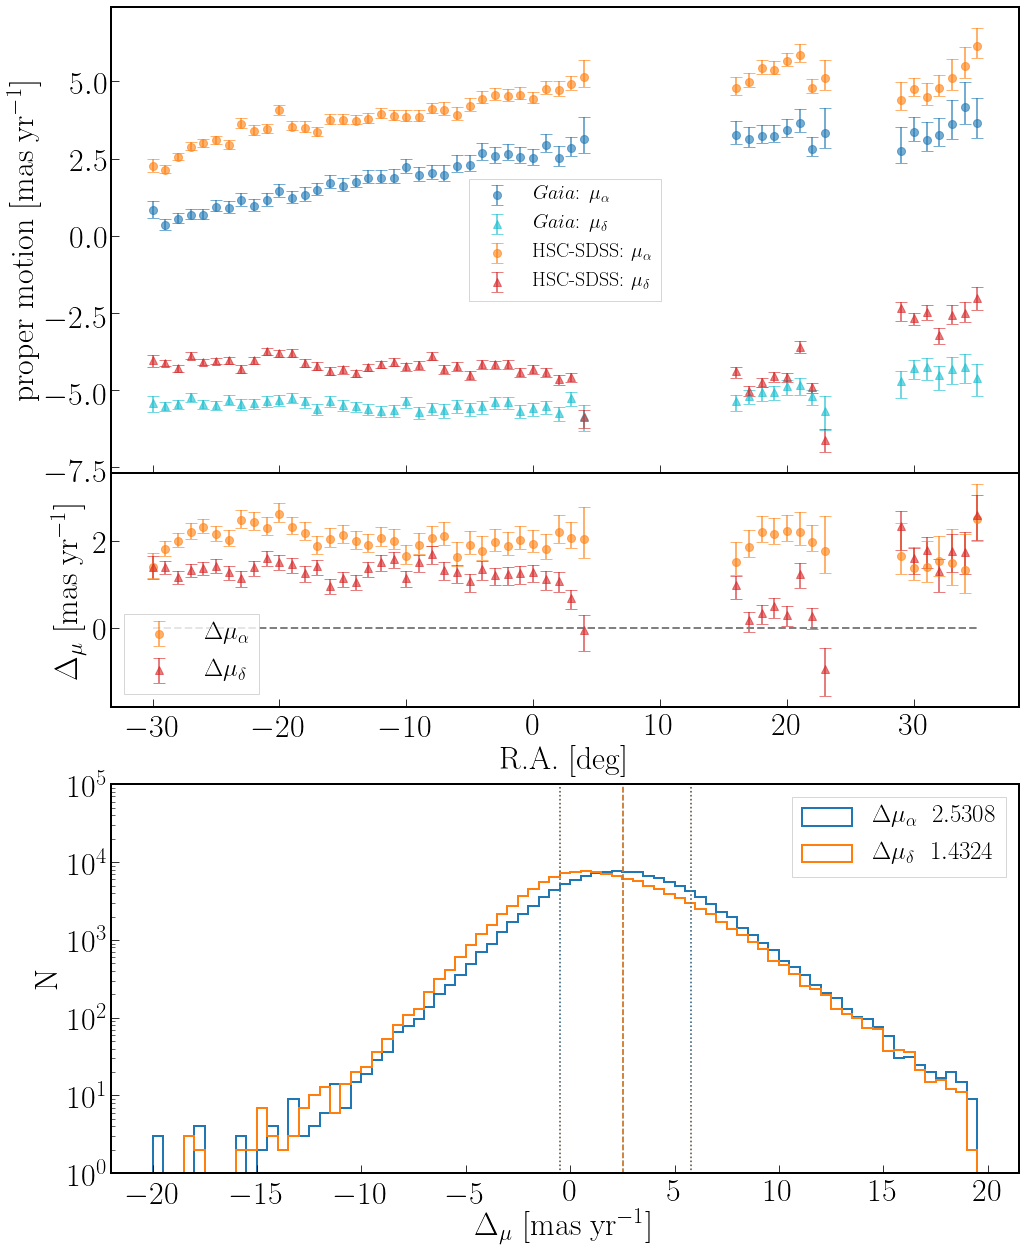

In [37]:
plt.figure(figsize=(14,18))
ax=plt.axes([0.05,0.59,0.9,0.36])
#plt.title(r'$\mu_\alpha$ and $\mu_\delta$ versus R.A. by stars matched with Gaia')
#plt.hlines(np.mean(mss.dra_cl),np.min(xm),np.max(xm),color='darkblue')
#plt.hlines(np.mean(mss.ddec_cl),np.min(xm),np.max(xm),color='darkred')
#plt.plot(xm,np.array(ram),color='darkblue')
#plt.plot(xm,np.array(decm),color='darkred')
plt.errorbar(x1Bin1,m1edianBin1,s1igGbin1,fmt='o',capsize=6,markersize=8,alpha=0.6,color='tab:blue',label=r'$Gaia$: $\mu_\alpha$')
plt.errorbar(x1Bin11,m1edianBin11,s1igGbin11,fmt='^',capsize=6,markersize=8,alpha=0.6,color='tab:cyan',label=r'$Gaia$: $\mu_\delta$')
#plt.plot(xm,ram3,color='cyan')
#plt.plot(xm,decm3,color='pink')
plt.errorbar(x1Bin2,m1edianBin2,s1igGbin2,fmt='o',capsize=6,markersize=8,alpha=0.6,color='tab:orange',label=r'HSC-SDSS: $\mu_\alpha$')
plt.errorbar(x1Bin21,m1edianBin21,s1igGbin21,fmt='^',capsize=6,markersize=8,alpha=0.6,color='tab:red',label=r'HSC-SDSS: $\mu_\delta$')
plt.legend(loc=10,fontsize=20)
plt.xlim()
plt.ylabel('proper motion [$\mathrm{mas\ yr^{-1}}$]',fontsize=32)
ax=plt.axes([0.05,0.41,0.9,0.18])
plt.errorbar(x1Bin3,m1edianBin3,s1igGbin3,fmt='o',capsize=6,markersize=8,alpha=0.6,color='tab:orange',label=r'$\Delta\mu_\alpha$')
plt.errorbar(x1Bin31,m1edianBin31,s1igGbin31,fmt='^',capsize=6,markersize=8,alpha=0.6,color='tab:red',label=r'$\Delta\mu_\delta$')
plt.hlines(0,min(x1Bin1),max(x1Bin1),color='grey',linestyle='dashed')
plt.legend()
plt.xlabel('R.A. [deg]')
plt.ylabel('$\Delta_\mu$ [$\mathrm{mas\ yr^{-1}}$]',fontsize=32)


ax=plt.axes([0.05,0.05,0.9,0.3])
plt.hist(pmra3,bins=np.arange(-20,20,0.5),linewidth=2,histtype='step',color='tab:blue',label=r'$\Delta\mu_{\alpha}\ \ %0.4f$'%(np.median(pmra3)))#,np.std(g.pmra_2-g.pmra_cl)))
plt.vlines(np.median(pmra3),0,1e5,linewidth=1.5,linestyles='dashed',color='tab:blue')
plt.hist(pmdec3,bins=np.arange(-20,20,0.5),linewidth=2,histtype='step',color='tab:orange',label=r'$\Delta\mu_{\delta}\ \ %0.4f$'%(np.median(pmdec3)))#,np.std(g.pmdec_2-g.pmdec_cl)))
plt.vlines(np.median(pmra3),0,1e5,linewidth=1.5,linestyles='dashed',color='tab:orange')
plt.vlines(np.percentile(pmra3,16),0,1e5,linewidth=1.5,linestyles='dotted',color='tab:orange')
plt.vlines(np.percentile(pmra3,84),0,1e5,linewidth=1.5,linestyles='dotted',color='tab:orange')
plt.vlines(np.percentile(pmra3,16),0,1e5,linewidth=1.5,linestyles='dotted',color='tab:blue')
plt.vlines(np.percentile(pmra3,84),0,1e5,linewidth=1.5,linestyles='dotted',color='tab:blue')
plt.yscale('log')
plt.ylim([1,1e5])
plt.ylabel('N',fontsize=32)
plt.xlabel(r'$\Delta_\mu\ [\mathrm{mas\ yr^{-1}}]$',fontsize=32)
plt.legend()
plt.savefig('/Users/tianqiu/Documents/final/check2/gaia_dcr.pdf')

In [56]:
x=np.arange(-30,36.05,0.05)#1320
y=np.arange(-1.25,1.3,0.05)#50
def cali_s(i):#for i in range(len(x)-1): #columns, ra
    print(i)
    t=[]
    for j in range(len(y)-1): #rows, dec
        tt=g[(g.i_sdsscentroid_ra<x[i+1])&(g.i_sdsscentroid_ra>x[i])&(g.i_sdsscentroid_dec>y[j])&(g.i_sdsscentroid_dec<y[j+1])].copy()
        if len(tt)==0:
            continue
        tt['pmra_cl_g']=tt.pmra_g-Zra.iloc[j,i]
        tt['pmdec_cl_g']=tt.pmdec_g-Zdec.iloc[j,i]
        t.append(tt)
    if len(t)!=0:
        ttt=pd.concat(t)
        print(i,'-',len(ttt))
        return ttt
    else:
        print(i,'-0')
        return tt
            

In [57]:
pool1=mp.Pool(12)
data2=pool1.map(cali_s,range(len(x)-1))
pool1.close()

56
112
0
280
28
84
224
308
140
252
168
196
0 - 105
1
28 - 168
112 - 183
29
196 - 136
56 - 201
197
113
224 - 165
57
225
168 - 133
84 - 214
169
85
140 - 160
308 - 150
141
309
280 - 160
252 - 187
281
253
1 - 74
2
29 - 217
30
169 - 161
170
85 - 227
86
141 - 147
142
113 - 199
57 - 181
197 - 157
58
114
198
309 - 165
225 - 125
281 - 167
226
310
282
253 - 177
254
2 - 104
3
170 - 141
171
30 - 182
31
142 - 144
143
198 - 135
310 - 165
199
86 - 202
311
87
114 - 183
58 - 215
254 - 142
226 - 158
115
227
59
255
282 - 185
283
3 - 134
4
143 - 130
171 - 144
144
172
31 - 177
32
199 - 146
87 - 190
88
115 - 149
116
227 - 136
228
200
311 - 148
312
59 - 189
255 - 160
256
60
283 - 188
284
4 - 128
5
144 - 119
145
32 - 197
33
172 - 162
173
312 - 153
200 - 137
313
201
88 - 199
228 - 145
89
229
60 - 160
61
116 - 177
117
256 - 155
257
284 - 180
285
5 - 124
6
145 - 118
146
173 - 163
174
201 - 152
202
61 - 201
89 - 152
313 - 152
90
62
314
229 - 148
117 - 164
257 - 165
230
118
258
33 - 217
34
285 - 187
286
6 - 121
7


582
666 - 73
667
609 - 112
610
358 - 177
442 - 116
359
526 - 104
443
527
498 - 104
499
470 - 88
471
638 - 114
639
414 - 139
415
386 - 155
387
554 - 131
555
667 - 75
668
582 - 114
583
610 - 142
611
443 - 150
444
527 - 125
359 - 174
528
360
499 - 109
500
471 - 96
472
639 - 98
640
415 - 145
416
387 - 150
388
668 - 82
669
555 - 149
556
583 - 112
584
611 - 104
612
444 - 147
445
360 - 158
500 - 105
528 - 126
501
529
361
472 - 106
473
640 - 107
641
416 - 135
417
669 - 115
670
388 - 167
389
556 - 148
557
584 - 126
585
612 - 137
613
445 - 122
446
641 - 108
642
361 - 155
501 - 112
362
502
529 - 115
473 - 114
474
530
670 - 70
671
417 - 127
418
389 - 166
390
557 - 137
558
585 - 143
586
613 - 145
614
642 - 98
643
446 - 136
447
474 - 120
475
502 - 108
503
671 - 81
362 - 182
363
530 - 147
531
672
418 - 130
419
390 - 174
391
558 - 138
559
586 - 122
587
643 - 91
672 - 76
673
614 - 142
615
700
447 - 124
503 - 114
475 - 119
728
531 - 128
363 - 193
756
784
812
419 - 127
840
868
391 - 136
700 -0
701
896
55

1091 -0
1225 - 39
1055
1226
1147 -0
1175 - 9
1250 - 29
1251
1028 - 86
1029
1267 - 27
1268
1295 - 23
1296
1198 - 76
1199
1226 - 37
1227
1055 - 33
1056
1251 - 24
1252
1268 - 31
1296 - 21
1269
1297
1029 - 123
1199 - 65
1200
1030
1227 - 49
1228
1056 - 31
1057
1252 - 25
1253
1269 - 23
1270
1297 - 20
1298
1200 - 79
1201
1228 - 42
1229
1057 - 30
1058
1253 - 26
1254
1030 - 113
1031
1270 - 24
1271
1298 - 14
1299
1229 - 40
1201 - 65
1230
1202
1254 - 21
1255
1058 - 25
1059
1271 - 27
1272
1299 - 20
1300
1031 - 108
1032
1255 - 27
1059 - 4
1256
1060
1230 - 41
1231
1202 - 46
1203
1300 - 35
1272 - 32
1301
1273
1060 -0
1061
1032 - 105
1033
1256 - 29
1257
1231 - 41
1203 - 63
1301 - 23
1302
1273 - 17
1274
1061 -0
1062
1257 - 35
1258
1033 - 128
1034
1302 - 33
1303
1274 - 32
1275
1062 -0
1063
1258 - 28
1259
1303 - 25
1304
1063 -0
1275 - 31
1276
1034 - 96
1035
1259 - 12
1304 - 30
1305
1276 - 26
1277
1035 - 112
1305 - 30
1277 - 12
1306
1278
1278 - 26
1279
1306 - 36
1307
1279 - 27
1280
1307 - 21
1308
1280 - 2

In [58]:
g=pd.concat(data2)

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [59]:
ra=g.i_sdsscentroid_ra
pmra1=g.pmra_2
pmra2=g.pmra_cl_g
pmra3=g.pmra_cl_g-g.pmra_2
pmdec1=g.pmdec_2
pmdec2=g.pmdec_cl_g
pmdec3=g.pmdec_cl_g-g.pmdec_2

x1Bin1, n1Pts1, m1edianBin1, s1igGbin1 = fitMedians(ra, pmra1, -30.5, 35.5, 66, 0)#gaia
x1Bin2, n1Pts2, m1edianBin2, s1igGbin2 = fitMedians(ra, pmra2, -30.5, 35.5, 66, 0)#HSC-S82
#difference
s1igGbin3=s1igGbin1
x1Bin3 = x1Bin1
m1edianBin3=m1edianBin2-m1edianBin1
s1igGbin3[0]=np.sqrt(s1igGbin2[0]**2+s1igGbin1[0]**2)
s1igGbin3[1]=np.sqrt(s1igGbin2[1]**2+s1igGbin1[1]**2)

x1Bin11, n1Pts11, m1edianBin11, s1igGbin11 = fitMedians(ra, pmdec1, -30.5, 35.5, 66, 0)
x1Bin21, n1Pts21, m1edianBin21, s1igGbin21 = fitMedians(ra, pmdec2, -30.5, 35.5, 66, 0)
#difference
x1Bin31 = x1Bin11
s1igGbin31=s1igGbin11
m1edianBin31=m1edianBin21-m1edianBin11
s1igGbin31[0]=np.sqrt(s1igGbin21[0]**2+s1igGbin11[0]**2)
s1igGbin31[1]=np.sqrt(s1igGbin21[1]**2+s1igGbin11[1]**2)
    

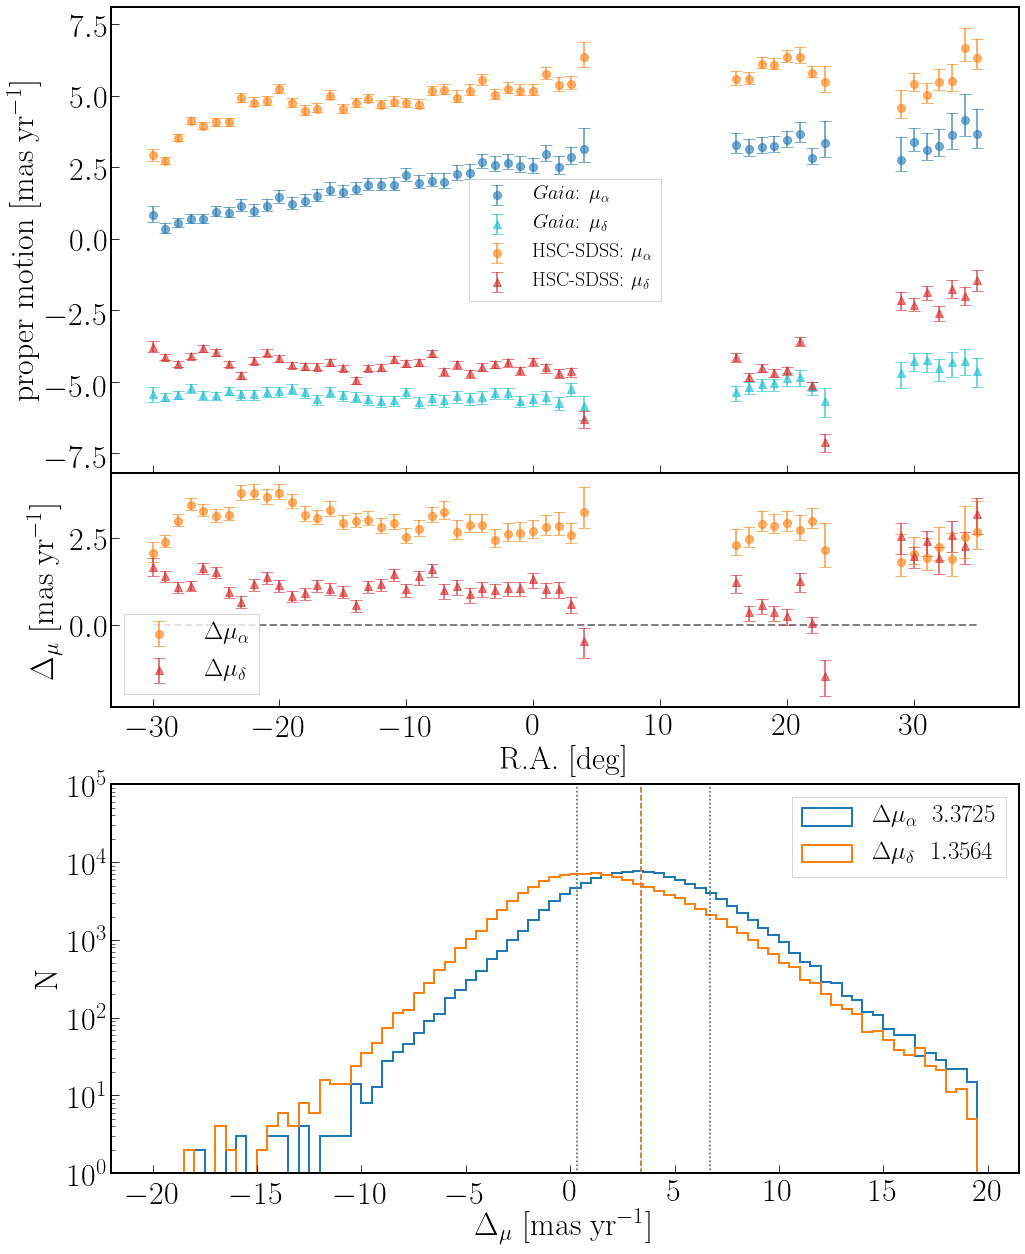

In [60]:
plt.figure(figsize=(14,18))
ax=plt.axes([0.05,0.59,0.9,0.36])
#plt.title(r'$\mu_\alpha$ and $\mu_\delta$ versus R.A. by stars matched with Gaia')
#plt.hlines(np.mean(mss.dra_cl),np.min(xm),np.max(xm),color='darkblue')
#plt.hlines(np.mean(mss.ddec_cl),np.min(xm),np.max(xm),color='darkred')
#plt.plot(xm,np.array(ram),color='darkblue')
#plt.plot(xm,np.array(decm),color='darkred')
plt.errorbar(x1Bin1,m1edianBin1,s1igGbin1,fmt='o',capsize=6,markersize=8,alpha=0.6,color='tab:blue',label=r'$Gaia$: $\mu_\alpha$')
plt.errorbar(x1Bin11,m1edianBin11,s1igGbin11,fmt='^',capsize=6,markersize=8,alpha=0.6,color='tab:cyan',label=r'$Gaia$: $\mu_\delta$')
#plt.plot(xm,ram3,color='cyan')
#plt.plot(xm,decm3,color='pink')
plt.errorbar(x1Bin2,m1edianBin2,s1igGbin2,fmt='o',capsize=6,markersize=8,alpha=0.6,color='tab:orange',label=r'HSC-SDSS: $\mu_\alpha$')
plt.errorbar(x1Bin21,m1edianBin21,s1igGbin21,fmt='^',capsize=6,markersize=8,alpha=0.6,color='tab:red',label=r'HSC-SDSS: $\mu_\delta$')
plt.legend(loc=10,fontsize=20)
plt.xlim()
plt.ylabel('proper motion [$\mathrm{mas\ yr^{-1}}$]',fontsize=32)
ax=plt.axes([0.05,0.41,0.9,0.18])
plt.errorbar(x1Bin3,m1edianBin3,s1igGbin3,fmt='o',capsize=6,markersize=8,alpha=0.6,color='tab:orange',label=r'$\Delta\mu_\alpha$')
plt.errorbar(x1Bin31,m1edianBin31,s1igGbin31,fmt='^',capsize=6,markersize=8,alpha=0.6,color='tab:red',label=r'$\Delta\mu_\delta$')
plt.hlines(0,min(x1Bin1),max(x1Bin1),color='grey',linestyle='dashed')
plt.legend()
plt.xlabel('R.A. [deg]')
plt.ylabel('$\Delta_\mu$ [$\mathrm{mas\ yr^{-1}}$]',fontsize=32)


ax=plt.axes([0.05,0.05,0.9,0.3])
plt.hist(pmra3,bins=np.arange(-20,20,0.5),linewidth=2,histtype='step',color='tab:blue',label=r'$\Delta\mu_{\alpha}\ \ %0.4f$'%(np.median(pmra3)))#,np.std(g.pmra_2-g.pmra_cl)))
plt.vlines(np.median(pmra3),0,1e5,linewidth=1.5,linestyles='dashed',color='tab:blue')
plt.hist(pmdec3,bins=np.arange(-20,20,0.5),linewidth=2,histtype='step',color='tab:orange',label=r'$\Delta\mu_{\delta}\ \ %0.4f$'%(np.median(pmdec3)))#,np.std(g.pmdec_2-g.pmdec_cl)))
plt.vlines(np.median(pmra3),0,1e5,linewidth=1.5,linestyles='dashed',color='tab:orange')
plt.vlines(np.percentile(pmra3,16),0,1e5,linewidth=1.5,linestyles='dotted',color='tab:orange')
plt.vlines(np.percentile(pmra3,84),0,1e5,linewidth=1.5,linestyles='dotted',color='tab:orange')
plt.vlines(np.percentile(pmra3,16),0,1e5,linewidth=1.5,linestyles='dotted',color='tab:blue')
plt.vlines(np.percentile(pmra3,84),0,1e5,linewidth=1.5,linestyles='dotted',color='tab:blue')
plt.yscale('log')
plt.ylim([1,1e5])
plt.ylabel('N',fontsize=32)
plt.xlabel(r'$\Delta_\mu\ [\mathrm{mas\ yr^{-1}}]$',fontsize=32)
plt.legend()
#plt.savefig('/Users/tianqiu/Documents/final/check2/gaia_dcr.pdf')

In [44]:
ra=g.i_sdsscentroid_ra
pmra1=g.pmra_2
pmra2=g.pmra_cl_gi
pmra3=g.pmra_cl_gi-g.pmra_2
pmdec1=g.pmdec_2
pmdec2=g.pmdec_cl_gi
pmdec3=g.pmdec_cl_gi-g.pmdec_2

x1Bin1, n1Pts1, m1edianBin1, s1igGbin1 = fitMedians(ra, pmra1, -30.5, 35.5, 66, 0)#gaia
x1Bin2, n1Pts2, m1edianBin2, s1igGbin2 = fitMedians(ra, pmra2, -30.5, 35.5, 66, 0)#HSC-S82
#difference
s1igGbin3=s1igGbin1
x1Bin3 = x1Bin1
m1edianBin3=m1edianBin2-m1edianBin1
s1igGbin3[0]=np.sqrt(s1igGbin2[0]**2+s1igGbin1[0]**2)
s1igGbin3[1]=np.sqrt(s1igGbin2[1]**2+s1igGbin1[1]**2)

x1Bin11, n1Pts11, m1edianBin11, s1igGbin11 = fitMedians(ra, pmdec1, -30.5, 35.5, 66, 0)
x1Bin21, n1Pts21, m1edianBin21, s1igGbin21 = fitMedians(ra, pmdec2, -30.5, 35.5, 66, 0)
#difference
x1Bin31 = x1Bin11
s1igGbin31=s1igGbin11
m1edianBin31=m1edianBin21-m1edianBin11
s1igGbin31[0]=np.sqrt(s1igGbin21[0]**2+s1igGbin11[0]**2)
s1igGbin31[1]=np.sqrt(s1igGbin21[1]**2+s1igGbin11[1]**2)
    

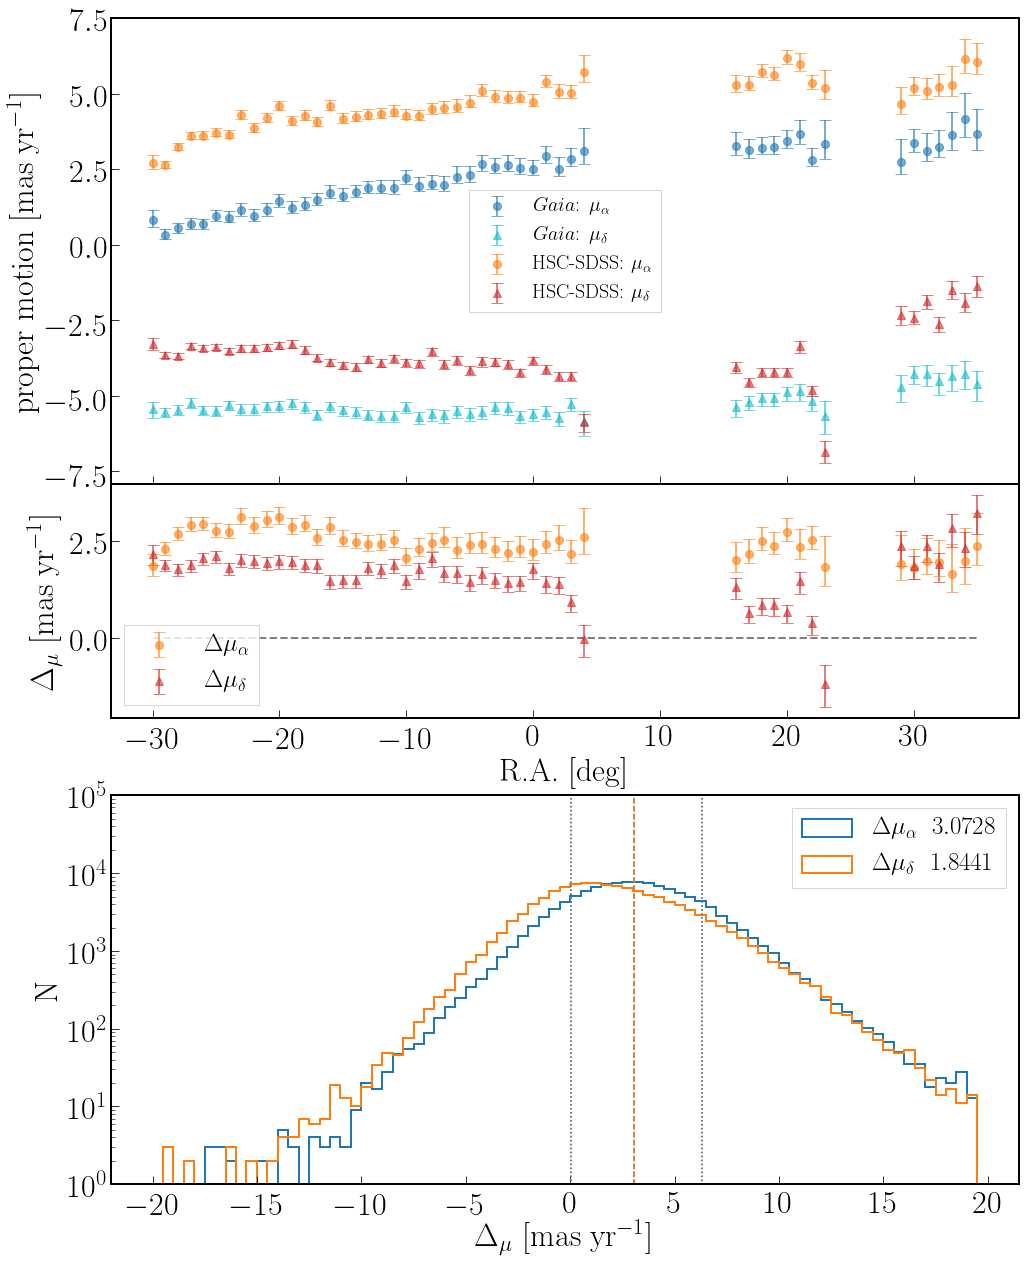

In [45]:
plt.figure(figsize=(14,18))
ax=plt.axes([0.05,0.59,0.9,0.36])
#plt.title(r'$\mu_\alpha$ and $\mu_\delta$ versus R.A. by stars matched with Gaia')
#plt.hlines(np.mean(mss.dra_cl),np.min(xm),np.max(xm),color='darkblue')
#plt.hlines(np.mean(mss.ddec_cl),np.min(xm),np.max(xm),color='darkred')
#plt.plot(xm,np.array(ram),color='darkblue')
#plt.plot(xm,np.array(decm),color='darkred')
plt.errorbar(x1Bin1,m1edianBin1,s1igGbin1,fmt='o',capsize=6,markersize=8,alpha=0.6,color='tab:blue',label=r'$Gaia$: $\mu_\alpha$')
plt.errorbar(x1Bin11,m1edianBin11,s1igGbin11,fmt='^',capsize=6,markersize=8,alpha=0.6,color='tab:cyan',label=r'$Gaia$: $\mu_\delta$')
#plt.plot(xm,ram3,color='cyan')
#plt.plot(xm,decm3,color='pink')
plt.errorbar(x1Bin2,m1edianBin2,s1igGbin2,fmt='o',capsize=6,markersize=8,alpha=0.6,color='tab:orange',label=r'HSC-SDSS: $\mu_\alpha$')
plt.errorbar(x1Bin21,m1edianBin21,s1igGbin21,fmt='^',capsize=6,markersize=8,alpha=0.6,color='tab:red',label=r'HSC-SDSS: $\mu_\delta$')
plt.legend(loc=10,fontsize=20)
plt.xlim()
plt.ylabel('proper motion [$\mathrm{mas\ yr^{-1}}$]',fontsize=32)
ax=plt.axes([0.05,0.41,0.9,0.18])
plt.errorbar(x1Bin3,m1edianBin3,s1igGbin3,fmt='o',capsize=6,markersize=8,alpha=0.6,color='tab:orange',label=r'$\Delta\mu_\alpha$')
plt.errorbar(x1Bin31,m1edianBin31,s1igGbin31,fmt='^',capsize=6,markersize=8,alpha=0.6,color='tab:red',label=r'$\Delta\mu_\delta$')
plt.hlines(0,min(x1Bin1),max(x1Bin1),color='grey',linestyle='dashed')
plt.legend()
plt.xlabel('R.A. [deg]')
plt.ylabel('$\Delta_\mu$ [$\mathrm{mas\ yr^{-1}}$]',fontsize=32)


ax=plt.axes([0.05,0.05,0.9,0.3])
plt.hist(pmra3,bins=np.arange(-20,20,0.5),linewidth=2,histtype='step',color='tab:blue',label=r'$\Delta\mu_{\alpha}\ \ %0.4f$'%(np.median(pmra3)))#,np.std(g.pmra_2-g.pmra_cl)))
plt.vlines(np.median(pmra3),0,1e5,linewidth=1.5,linestyles='dashed',color='tab:blue')
plt.hist(pmdec3,bins=np.arange(-20,20,0.5),linewidth=2,histtype='step',color='tab:orange',label=r'$\Delta\mu_{\delta}\ \ %0.4f$'%(np.median(pmdec3)))#,np.std(g.pmdec_2-g.pmdec_cl)))
plt.vlines(np.median(pmra3),0,1e5,linewidth=1.5,linestyles='dashed',color='tab:orange')
plt.vlines(np.percentile(pmra3,16),0,1e5,linewidth=1.5,linestyles='dotted',color='tab:orange')
plt.vlines(np.percentile(pmra3,84),0,1e5,linewidth=1.5,linestyles='dotted',color='tab:orange')
plt.vlines(np.percentile(pmra3,16),0,1e5,linewidth=1.5,linestyles='dotted',color='tab:blue')
plt.vlines(np.percentile(pmra3,84),0,1e5,linewidth=1.5,linestyles='dotted',color='tab:blue')
plt.yscale('log')
plt.ylim([1,1e5])
plt.ylabel('N',fontsize=32)
plt.xlabel(r'$\Delta_\mu\ [\mathrm{mas\ yr^{-1}}]$',fontsize=32)
plt.legend()
plt.savefig('/Users/tianqiu/Documents/final/check2/gaia_dcr.pdf')